In [1]:
#!pip3 install numpy
#!pip3 install pandas==0.23.0
#!pip3 install seaborn 
#!pip3 install Basemap
#!pip3 install matplotlib
#!pip3 install boto3 
#!pip3 install sklearn 
#!pip3 install botocore==1.13.20

In [1]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
from mpl_toolkits.basemap import Basemap

import matplotlib.cm as cm 
import os 
import boto3 
#from sklearn.preprocessing import LabelEncoder 
import warnings 
import csv 
%matplotlib inline 
import warnings 
warnings.filterwarnings("ignore")
colors = ['red','blue','pink','yellow','green','purple','gold','orange','brown','black']

## Reading Data

In [ ]:
#For Downloading the files from S3 Bucket to Local or on EC2 
import boto3
import botocore

BUCKET_NAME = "upgradcapstone2022bucket" # replace with your bucket name
KEY = "capstonedata/appdata/appdata1" # replace with your object key
https://upgradcapstone2022bucket.s3.us-east-2.amazonaws.com/capstonedata/appdata/000000_0

s3 = boto3.resource('s3')
s3.Bucket(BUCKET_NAME).download_file(KEY, "train_app_data.csv")

In [16]:
train_app_data=pd.read_csv('train_app_data.csv',header = None, delimiter=",", quoting=csv.QUOTE_NONE, encoding='utf-8')

In [17]:
train_app_data.set_axis(['event_id', 'app_id', 'is_installed', 'is_active','label_id', 'category'],axis=1,inplace=True)
train_app_data.head()

,event_id,app_id,is_installed,is_active,label_id,category
0,2,-5720078949152207372,1,0,704,Property Industry 2.0
1,2,-1633887856876571208,1,0,1007,P2P net loan
2,2,-1633887856876571208,1,0,783,High risk
3,2,-1633887856876571208,1,0,779,Higher income
4,2,-1633887856876571208,1,0,775,Liquid medium


In [18]:
train_event_data=pd.read_csv('train_event_data.csv')

In [19]:
train_event_data.set_axis(['event_id','device_id', 'event_timestamp','longitude','latitude', 'gender','age', 'group_name'],axis=1,inplace=True)
train_event_data.head()

,event_id,device_id,event_timestamp,longitude,latitude,gender,age,group_name
0,1315995,-9222956879900150000,2016-05-06 15:42:15,113.24,23.19,M,36,M32+
1,2068832,-9222956879900150000,2016-05-07 12:20:13,113.24,23.19,M,36,M32+
2,1481001,-9222956879900150000,2016-05-06 15:34:54,113.24,23.19,M,36,M32+
3,2111353,-9222956879900150000,2016-05-07 12:09:01,113.24,23.19,M,36,M32+
4,1650018,-9222956879900150000,2016-05-06 15:32:26,113.24,23.19,M,36,M32+


In [20]:
train_non_event_data=pd.read_csv('train_non_event_data.csv')

In [21]:
train_non_event_data.set_axis(['device_id', 'phone_brand', 'device_model', 'gender','age', 'group_name'],axis=1,inplace=True)
train_non_event_data.head()

,device_id,phone_brand,device_model,gender,age,group_name
0,-9223067244542180000,vivo,Y19T,M,24,M0-24
1,-9223042152723780000,Xiaomi,MI 3,\N,\N,\N
2,-9222956879900150000,samsung,Galaxy Note 2,M,36,M32+
3,-9222896629442490000,OPPO,A31,\N,\N,\N
4,-9222894989445030000,Gionee,ELIFE E7 Mini,\N,\N,\N


## Cleaning Data

<AxesSubplot:>

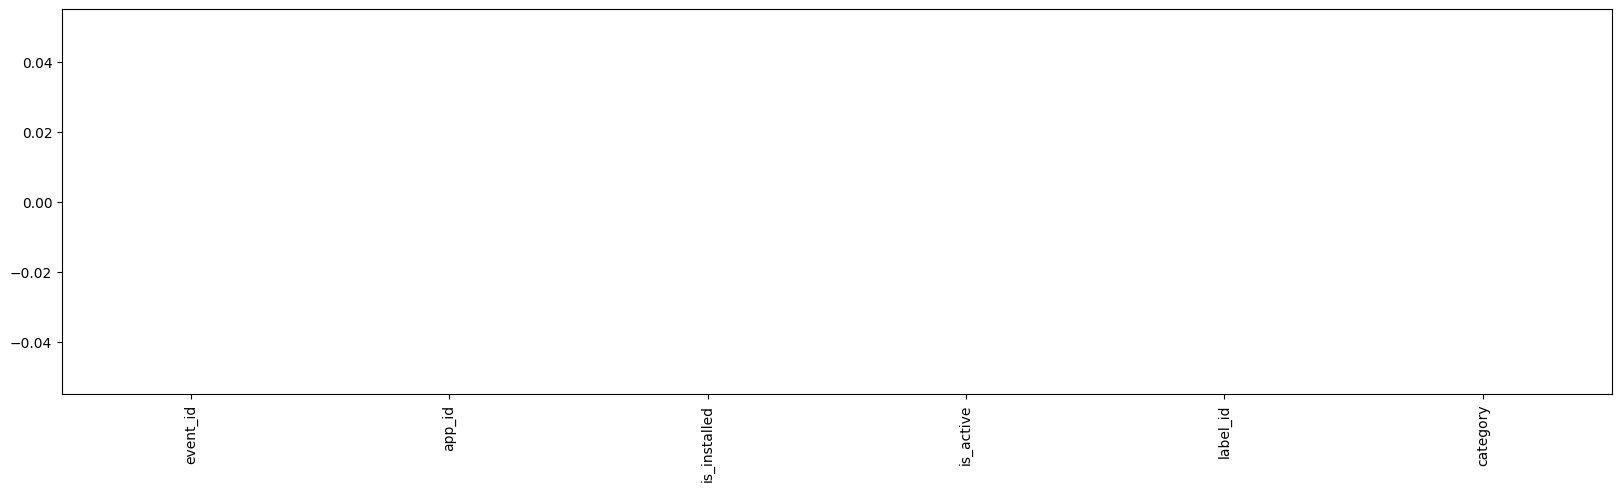

In [22]:
#calculating % of null values in each column
navalues1 = (train_app_data.isnull().sum()/train_app_data.shape[0])*100
#plotting the graph denoting the percentage of null values in each of the columns
navalues1.plot(kind='bar',figsize=(20,5))

<AxesSubplot:>

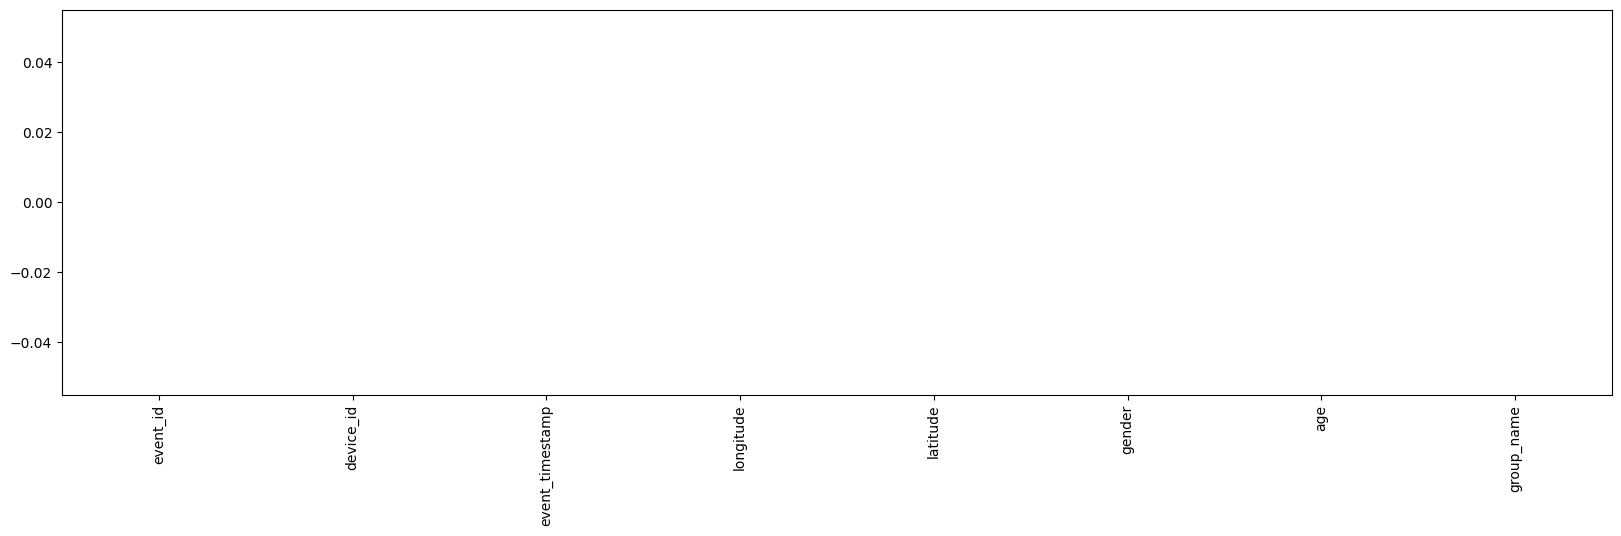

In [23]:
#calculating % of null values in each column
navalues2 = (train_event_data.isnull().sum()/train_event_data.shape[0])*100
#plotting the graph denoting the percentage of null values in each of the columns
navalues2.plot(kind='bar',figsize=(20,5))

<AxesSubplot:>

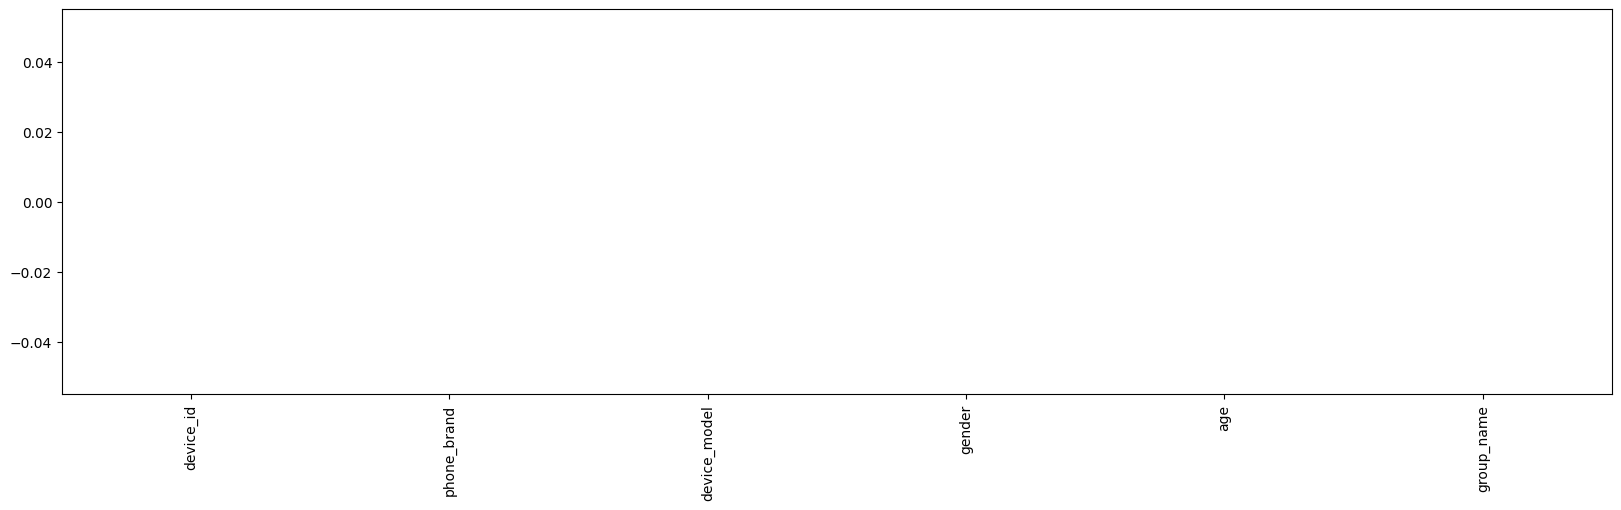

In [24]:
#calculating % of null values in each column
navalues3 = (train_non_event_data.isnull().sum()/train_non_event_data.shape[0])*100
#plotting the graph denoting the percentage of null values in each of the columns
navalues3.plot(kind='bar',figsize=(20,5))

In [25]:
#Retain columns that have <40% of missing values
for col in train_app_data.columns:
     if col not in navalues1[navalues1<40].index.tolist():
         del train_app_data[col]
#check the no of columns
train_app_data.shape

(209355710, 6)

In [26]:
#Retain columns that have <40% of missing values
for col in train_event_data.columns:
     if col not in navalues2[navalues2<40].index.tolist():
         del train_event_data[col]
#check the no of columns
train_event_data.shape

(3252949, 8)

In [27]:
#Retain columns that have <40% of missing values
for col in train_non_event_data.columns:
     if col not in navalues3[navalues3<40].index.tolist():
         del train_non_event_data[col]
#check the no of columns
train_non_event_data.shape

(187244, 6)

In [28]:
df_at0 = train_event_data[(train_event_data["longitude"]==0) & (train_event_data["latitude"]==0)]
df_near0 = train_event_data[(train_event_data["longitude"]>-1) &\
                     (train_event_data["longitude"]<1) &\
                     (train_event_data["latitude"]>-1) &\
                     (train_event_data["latitude"]<1)]

print("# events:", len(train_event_data))
print("# at (0,0)", len(df_at0))
print("# near (0,0)", len(df_near0))

# events: 3252949
# at (0,0) 968675
# near (0,0) 969871


## Basic EDA and Visualisation

#### 1. Plot appropriate graphs representing the distribution of age and gender in the data set [univariate]
#### age and gender are the target variables, so distribution/% of male and female are there in the dataset has to be analysed

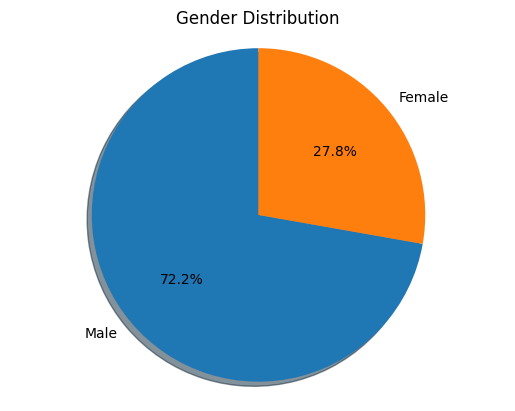

In [16]:
#https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html
gender_dict=train_event_data['gender'].value_counts()
gender_labels=['Male','Female']
male_percentage=(gender_dict['M']*100)//train_event_data.shape[0]
female_percentage=(gender_dict['F']*100)//train_event_data.shape[0]
sizes=[male_percentage,female_percentage]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=gender_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Gender Distribution')
plt.show()

In [29]:
#convert age column to float
train_event_data = train_event_data[train_event_data["age"] != '\\N']
train_event_data = train_event_data[train_event_data["gender"] != '\\N']

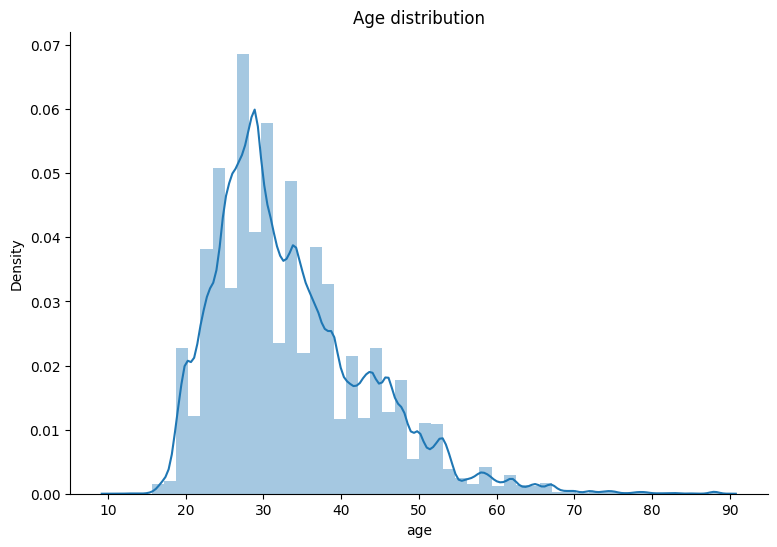

In [21]:
#age distribution
fig = plt.figure(figsize=(9, 6))
sns.distplot(train_event_data.age, ax=fig.gca())
plt.title('Age distribution')
sns.despine()

In [30]:
#converting gender/age to numeric
train_event_data.gender[train_event_data['gender'] == 'M'] = 1
train_event_data.gender[train_event_data['gender'] == 'F'] = 2
train_event_data.gender[train_event_data['gender'] == '\\N'] = 0
train_event_data.age[train_event_data['age'] == '\\N'] = 0
train_event_data.head()

,event_id,device_id,event_timestamp,longitude,latitude,gender,age,group_name
0,1315995,-9222956879900150000,2016-05-06 15:42:15,113.24,23.19,1,36,M32+
1,2068832,-9222956879900150000,2016-05-07 12:20:13,113.24,23.19,1,36,M32+
2,1481001,-9222956879900150000,2016-05-06 15:34:54,113.24,23.19,1,36,M32+
3,2111353,-9222956879900150000,2016-05-07 12:09:01,113.24,23.19,1,36,M32+
4,1650018,-9222956879900150000,2016-05-06 15:32:26,113.24,23.19,1,36,M32+


In [31]:
train_event_data["gender"].unique()

array([1, 2], dtype=object)

#### 2. Boxplot analysis for gender and age [bivariate].
#### trend analysis btw the gender(male and female) and with the age

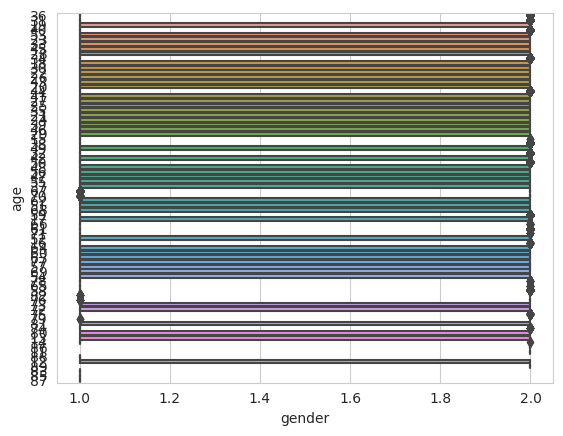

In [24]:
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='gender',y='age',data=train_event_data)

#### 3. Plot the percentage of the device_ids with and without event data. 
#### some % of device ids have event data and some dont - plot this over a graph

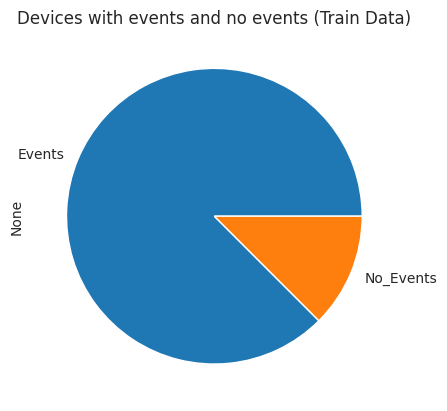

Devices with Events Percentage in Train Data:  12.498130781226635  %
Devices with No Events Percentage in Train Data:  87.50186921877336  %


In [25]:
plt.figure()
devices_events = np.in1d(train_non_event_data['device_id'].values,train_event_data['device_id'].values)
pd.Series(devices_events).map({True:'No_Events',False:'Events'}).value_counts().plot.pie()
plt.title("Devices with events and no events (Train Data)")
plt.show()
print("Devices with Events Percentage in Train Data: ",(list(devices_events).count(True)/len(devices_events))*100," %")
print("Devices with No Events Percentage in Train Data: ",(list(devices_events).count(False)/len(devices_events))*100, " %")

#### 4. Plot a graph representing the distribution of events over different days of a week. 
#### events associated wit ts, with ts figure different days of weeks, then plot it over sun-sat...
#### and analyse the distribution and pattern

In [32]:
#converting string to timestamp
#adding a new column representing day of the week
from datetime import datetime
format = '%Y-%m-%d %H:%M:%S'

train_event_data['event_timestamp_ts'] = train_event_data['event_timestamp'].apply(lambda x : datetime.strptime(x, format));
train_event_data['dayofweek'] = train_event_data['event_timestamp_ts'].apply(lambda x : x.dayofweek)
train_event_data.head(10)

,event_id,device_id,event_timestamp,longitude,latitude,gender,age,group_name,event_timestamp_ts,dayofweek
0,1315995,-9222956879900150000,2016-05-06 15:42:15,113.24,23.19,1,36,M32+,2016-05-06 15:42:15,4
1,2068832,-9222956879900150000,2016-05-07 12:20:13,113.24,23.19,1,36,M32+,2016-05-07 12:20:13,5
2,1481001,-9222956879900150000,2016-05-06 15:34:54,113.24,23.19,1,36,M32+,2016-05-06 15:34:54,4
3,2111353,-9222956879900150000,2016-05-07 12:09:01,113.24,23.19,1,36,M32+,2016-05-07 12:09:01,5
4,1650018,-9222956879900150000,2016-05-06 15:32:26,113.24,23.19,1,36,M32+,2016-05-06 15:32:26,4
5,1687118,-9222956879900150000,2016-05-06 15:39:42,113.24,23.19,1,36,M32+,2016-05-06 15:39:42,4
6,1620692,-9222956879900150000,2016-05-06 20:42:50,113.24,23.19,1,36,M32+,2016-05-06 20:42:50,4
7,2121199,-9222956879900150000,2016-05-06 20:49:39,0.00,0.00,1,36,M32+,2016-05-06 20:49:39,4
8,1180650,-9222956879900150000,2016-05-06 15:43:51,113.24,23.19,1,36,M32+,2016-05-06 15:43:51,4
9,1794538,-9222956879900150000,2016-05-07 07:04:04,113.24,23.19,1,36,M32+,2016-05-07 07:04:04,5


Text(0, 0.5, 'Events count')

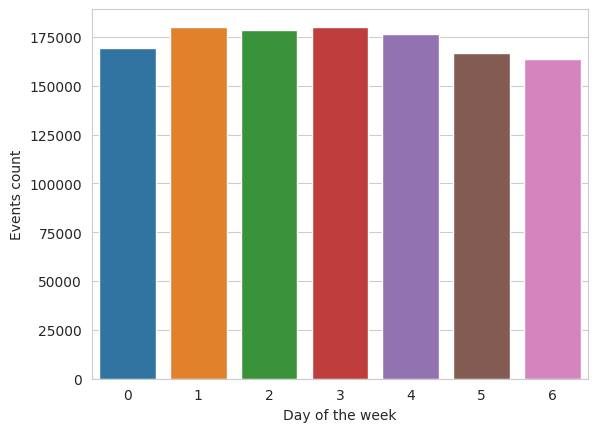

In [29]:
events_data = train_event_data[['event_id','dayofweek']]
event_counts = events_data["dayofweek"].value_counts().reset_index()
ax = sns.barplot(x = event_counts["index"], y = event_counts["dayofweek"])
ax.set_xlabel('Day of the week')
ax.set_ylabel('Events count')

#### 5. Plot a graph representing the distribution of events per hour [for one-week data].
#### events per hour, similar to 4, choose 1 week of data

In [33]:
#added a new column for the hour
train_event_data['hour'] = train_event_data['event_timestamp_ts'].apply(lambda x : x.hour)

Text(0, 0.5, 'Events count (10 day data)')

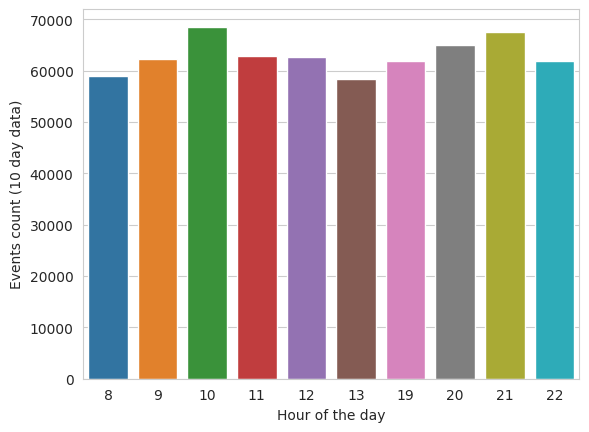

In [34]:
events_hour = train_event_data[['event_id','hour']]
event_hour_counts = events_hour["hour"].value_counts().reset_index().head(10)
ax = sns.barplot(x = event_hour_counts["index"], y = event_hour_counts["hour"])
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Events count (10 day data)')

#### 6. The difference in the distribution of events per hour for Male and Female consumers. [Show the difference using an appropriate chart for one-week data.]
#### same as 5 1 week of data, trends where males are more active vs females

In [35]:
females_events = train_event_data[train_event_data['gender'] ==2]
male_events = train_event_data[train_event_data['gender'] ==1]

f_events_hour = females_events[['event_id','hour']]
f_event_hour_counts = f_events_hour["hour"].value_counts().reset_index().head(20)

m_events_hour = male_events[['event_id','hour']]
m_event_hour_counts = m_events_hour["hour"].value_counts().reset_index().head(20)

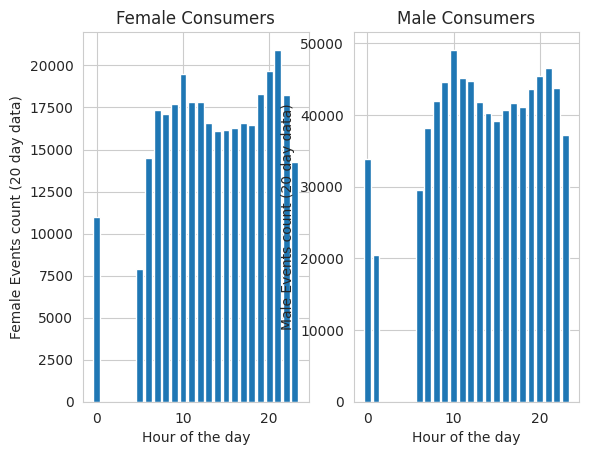

In [36]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.bar(f_event_hour_counts["index"], f_event_hour_counts["hour"])
plt.title("Female Consumers")
plt.xlabel('Hour of the day')
plt.ylabel('Female Events count (20 day data)')

plt.subplot(1, 2, 2) # index 2
plt.bar(m_event_hour_counts["index"], m_event_hour_counts["hour"])
plt.title("Male Consumers")
plt.xlabel('Hour of the day')
plt.ylabel('Male Events count (20 day data)')

plt.show()

#### 7. Is there any difference in the distribution of Events for different Age Groups over different days of the week? [Consider the following age groups: 0–24, 25–32, 33–45, and 46+]
#### plot event data over differnt days of the week from timestamp, analysse for agegrps

<AxesSubplot:xlabel='count', ylabel='group_name'>

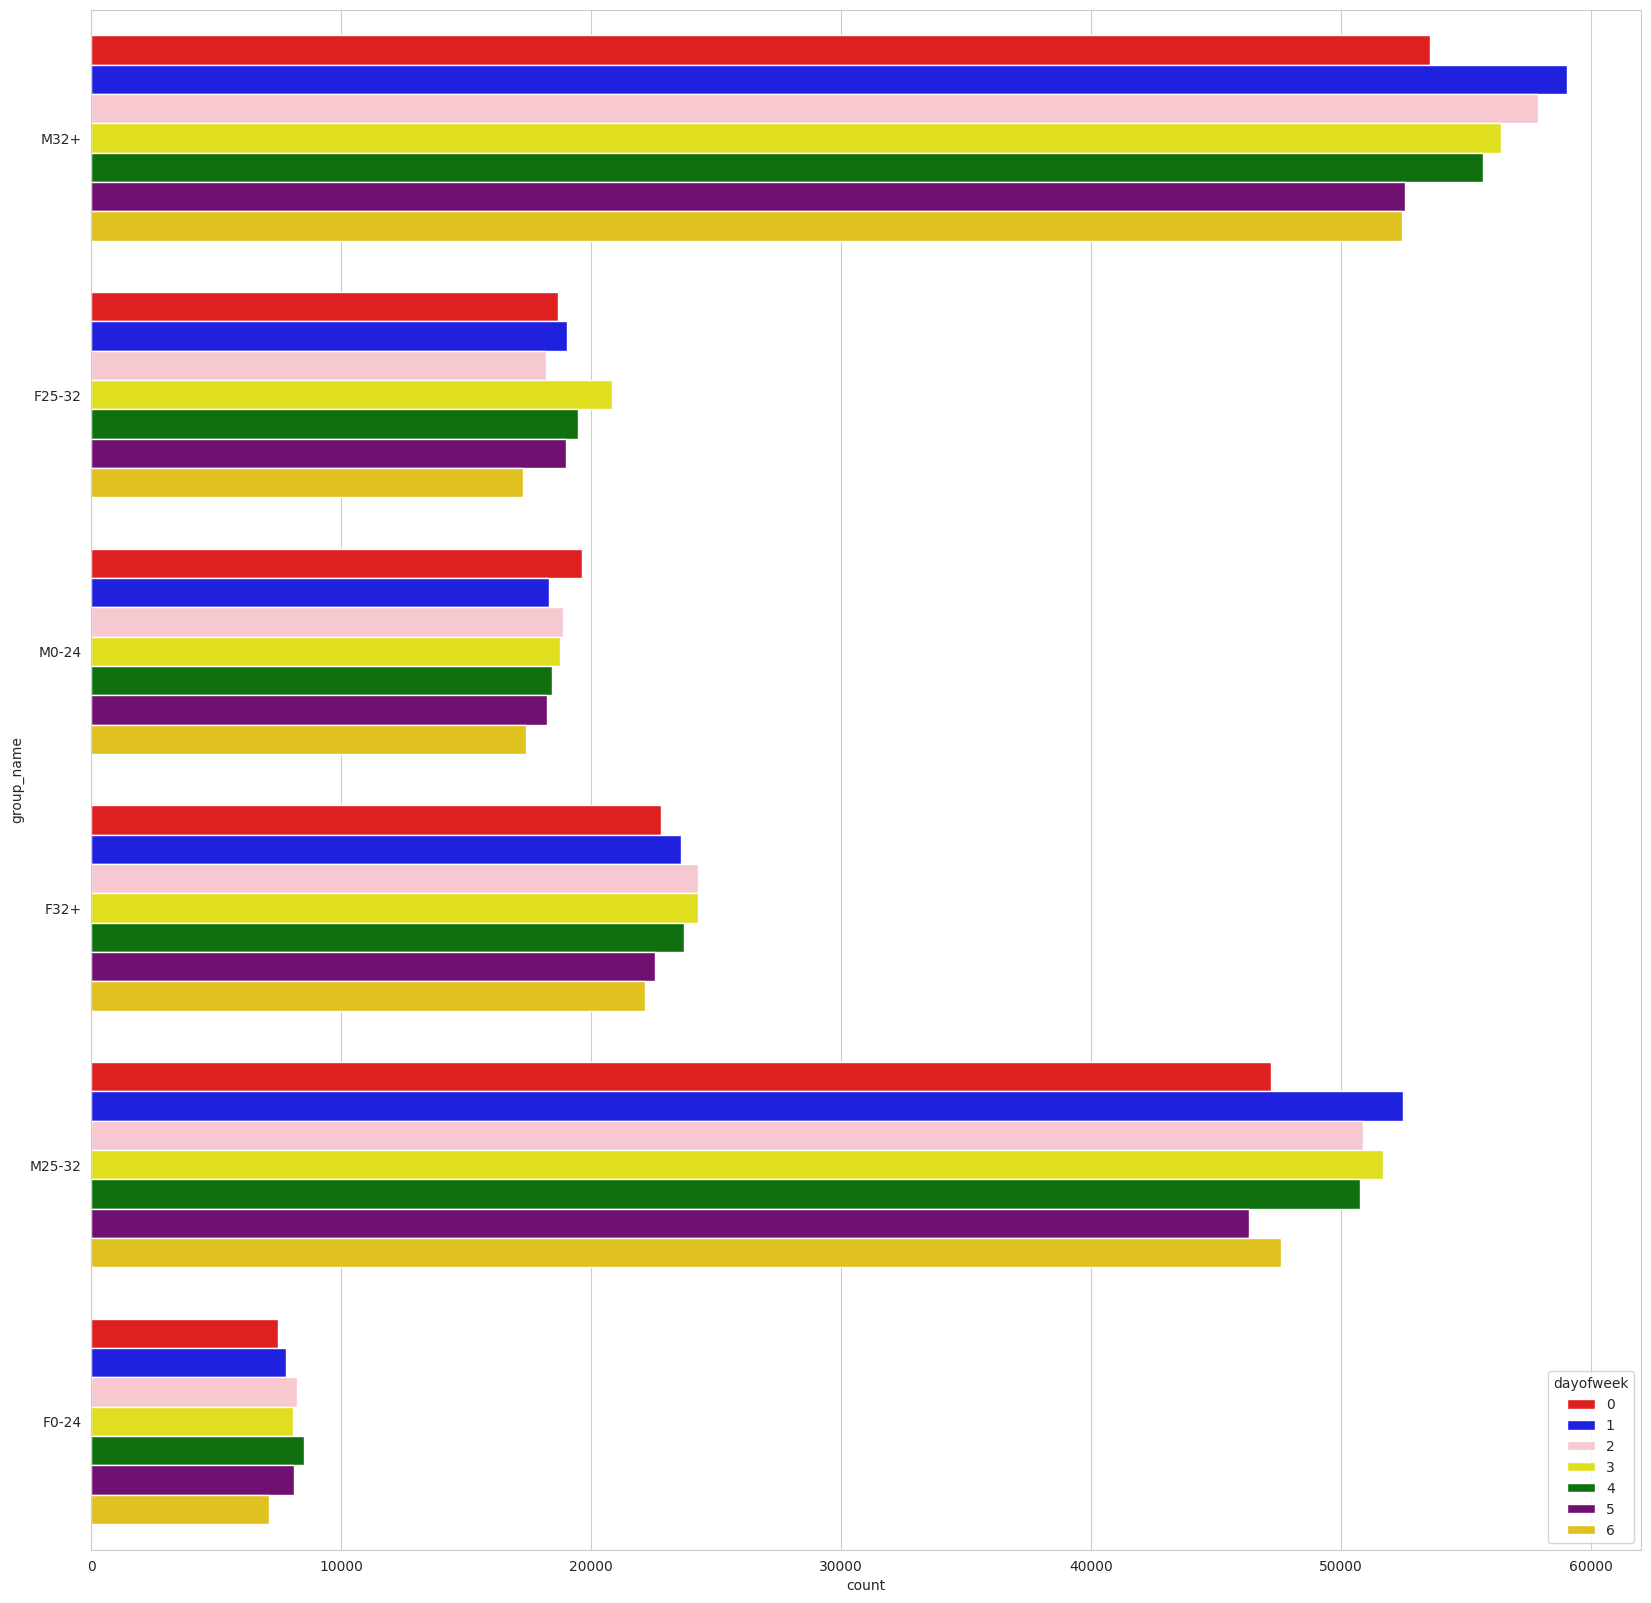

In [37]:
age_events_hour = train_event_data[['dayofweek','group_name']]
age_events_counts = age_events_hour['dayofweek'].value_counts().reset_index().head(10)['index']

plt.figure(figsize=(20,20))
sns.countplot(y="group_name", hue="dayofweek", data=age_events_hour[age_events_hour['dayofweek'].isin(age_events_counts)], palette=colors)

#### 8. Stacked bar chart for the top 10 mobile brands across male and female consumers.
#### top 10 mobile brands
#### stacked bar chart of male and females for each of the brand

In [34]:
#converting gender/age to numeric
train_non_event_data.gender[train_non_event_data['gender'] == 'M'] = 1
train_non_event_data.gender[train_non_event_data['gender'] == 'F'] = 2
train_non_event_data.gender[train_non_event_data['gender'] == '\\N'] = 0
train_non_event_data.age[train_non_event_data['age'] == '\\N'] = 0
train_non_event_data.head()

,device_id,phone_brand,device_model,gender,age,group_name
0,-9223067244542180000,vivo,Y19T,1,24,M0-24
1,-9223042152723780000,Xiaomi,MI 3,0,0,\N
2,-9222956879900150000,samsung,Galaxy Note 2,1,36,M32+
3,-9222896629442490000,OPPO,A31,0,0,\N
4,-9222894989445030000,Gionee,ELIFE E7 Mini,0,0,\N


In [40]:
# Queries to get the male data and female data to distinguish between brands
female_brands = train_non_event_data[train_non_event_data["gender"] == 2]
male_brands = train_non_event_data[train_non_event_data["gender"] == 1]

# Counting the brands that are used by specific genders
brand_counts_male = female_brands['phone_brand'].value_counts().reset_index().head(10)
brand_counts_female = male_brands['phone_brand'].value_counts().reset_index().head(10)

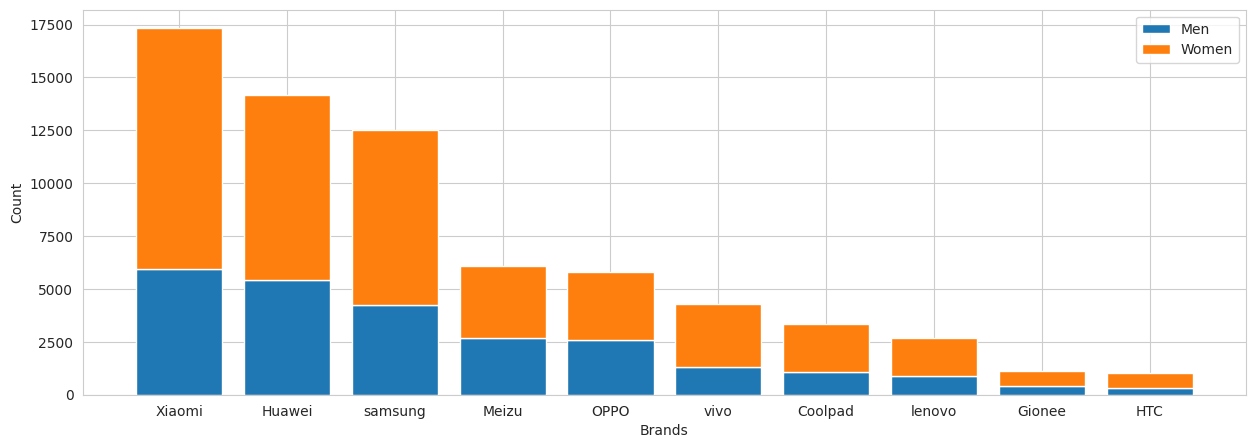

In [41]:
# Plotting to see if any brand is popular among any gender
plt.figure(figsize=(15,5))

ind = np.arange(len(list(brand_counts_female['index'])))  
plot_1 = plt.bar(ind, brand_counts_male['phone_brand'])
plot_2 = plt.bar(ind, brand_counts_female['phone_brand'], bottom=brand_counts_male['phone_brand'])

plt.xticks(ind, list(brand_counts_female['index']))
plt.xlabel('Brands')
plt.ylabel('Count')
plt.legend((plot_1,plot_2),('Men','Women'))
plt.show()

#### 9. Prepare a chart representing the ten frequently used applications and their respective male and female percentage.
#### most frequent 10 of them
#### % of female n male
#### some apps are heavily used by males nd some by females

In [42]:
# Merging the app data with events data
merged_data = train_event_data.merge(train_app_data, on='event_id', how='inner');

# Queries to get the male data and female data to distinguish between apps
female_apps = merged_data[merged_data["gender"] == 2]
male_apps = merged_data[merged_data["gender"] == 1]

# Counting the brands that are used by specific genders
app_counts_female = female_apps['category'].value_counts().reset_index().head(10)
app_counts_male = male_apps['category'].value_counts().reset_index().head(10)

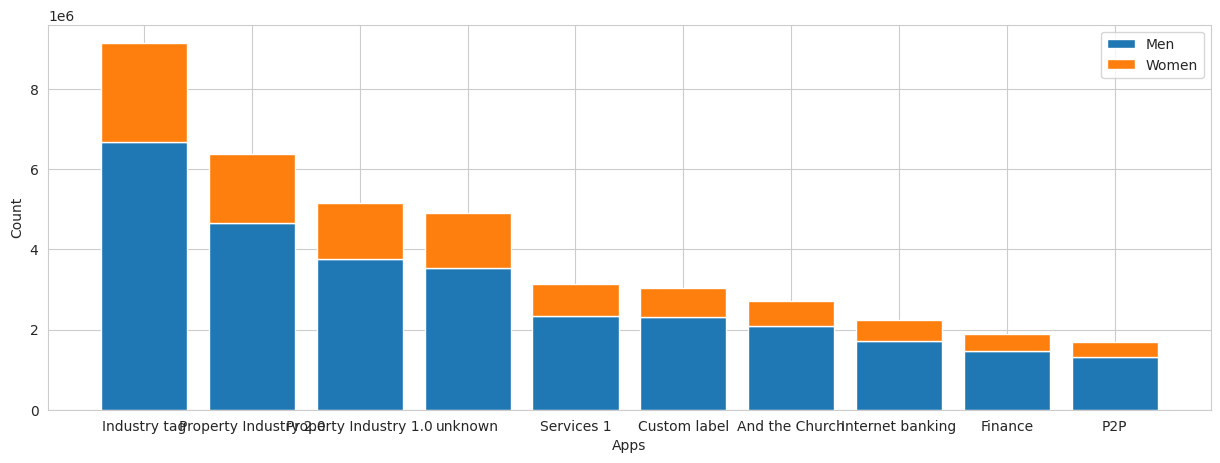

In [43]:
# Plotting to see if any app is popular among any gender
plt.figure(figsize=(15,5))

ind = np.arange(len(list(app_counts_female['index'])))  
plot_1 = plt.bar(ind, app_counts_male['category'])
plot_2 = plt.bar(ind, app_counts_female['category'], bottom=app_counts_male['category'])

plt.xticks(ind, list(app_counts_female['index']))
plt.xlabel('Apps')
plt.ylabel('Count')
plt.legend((plot_1,plot_2),('Men','Women'))
plt.show()

#### 10. List the top 10 mobile phone brands bought by customers by age groups. [Consider the following age groups: 0–24, 25–32, 33–45, and 46+]
#### first take age grps and then plot of the top the mobile brands

In [44]:
customer_group = train_non_event_data[['phone_brand','group_name']]
customer_group

,phone_brand,group_name
0,vivo,M0-24
1,Xiaomi,\N
2,samsung,M32+
3,OPPO,\N
4,Gionee,\N
...,...,...
187239,Huawei,\N
187240,Xiaomi,\N
187241,Huawei,\N
187242,Xiaomi,M0-24


<AxesSubplot:xlabel='count', ylabel='group_name'>

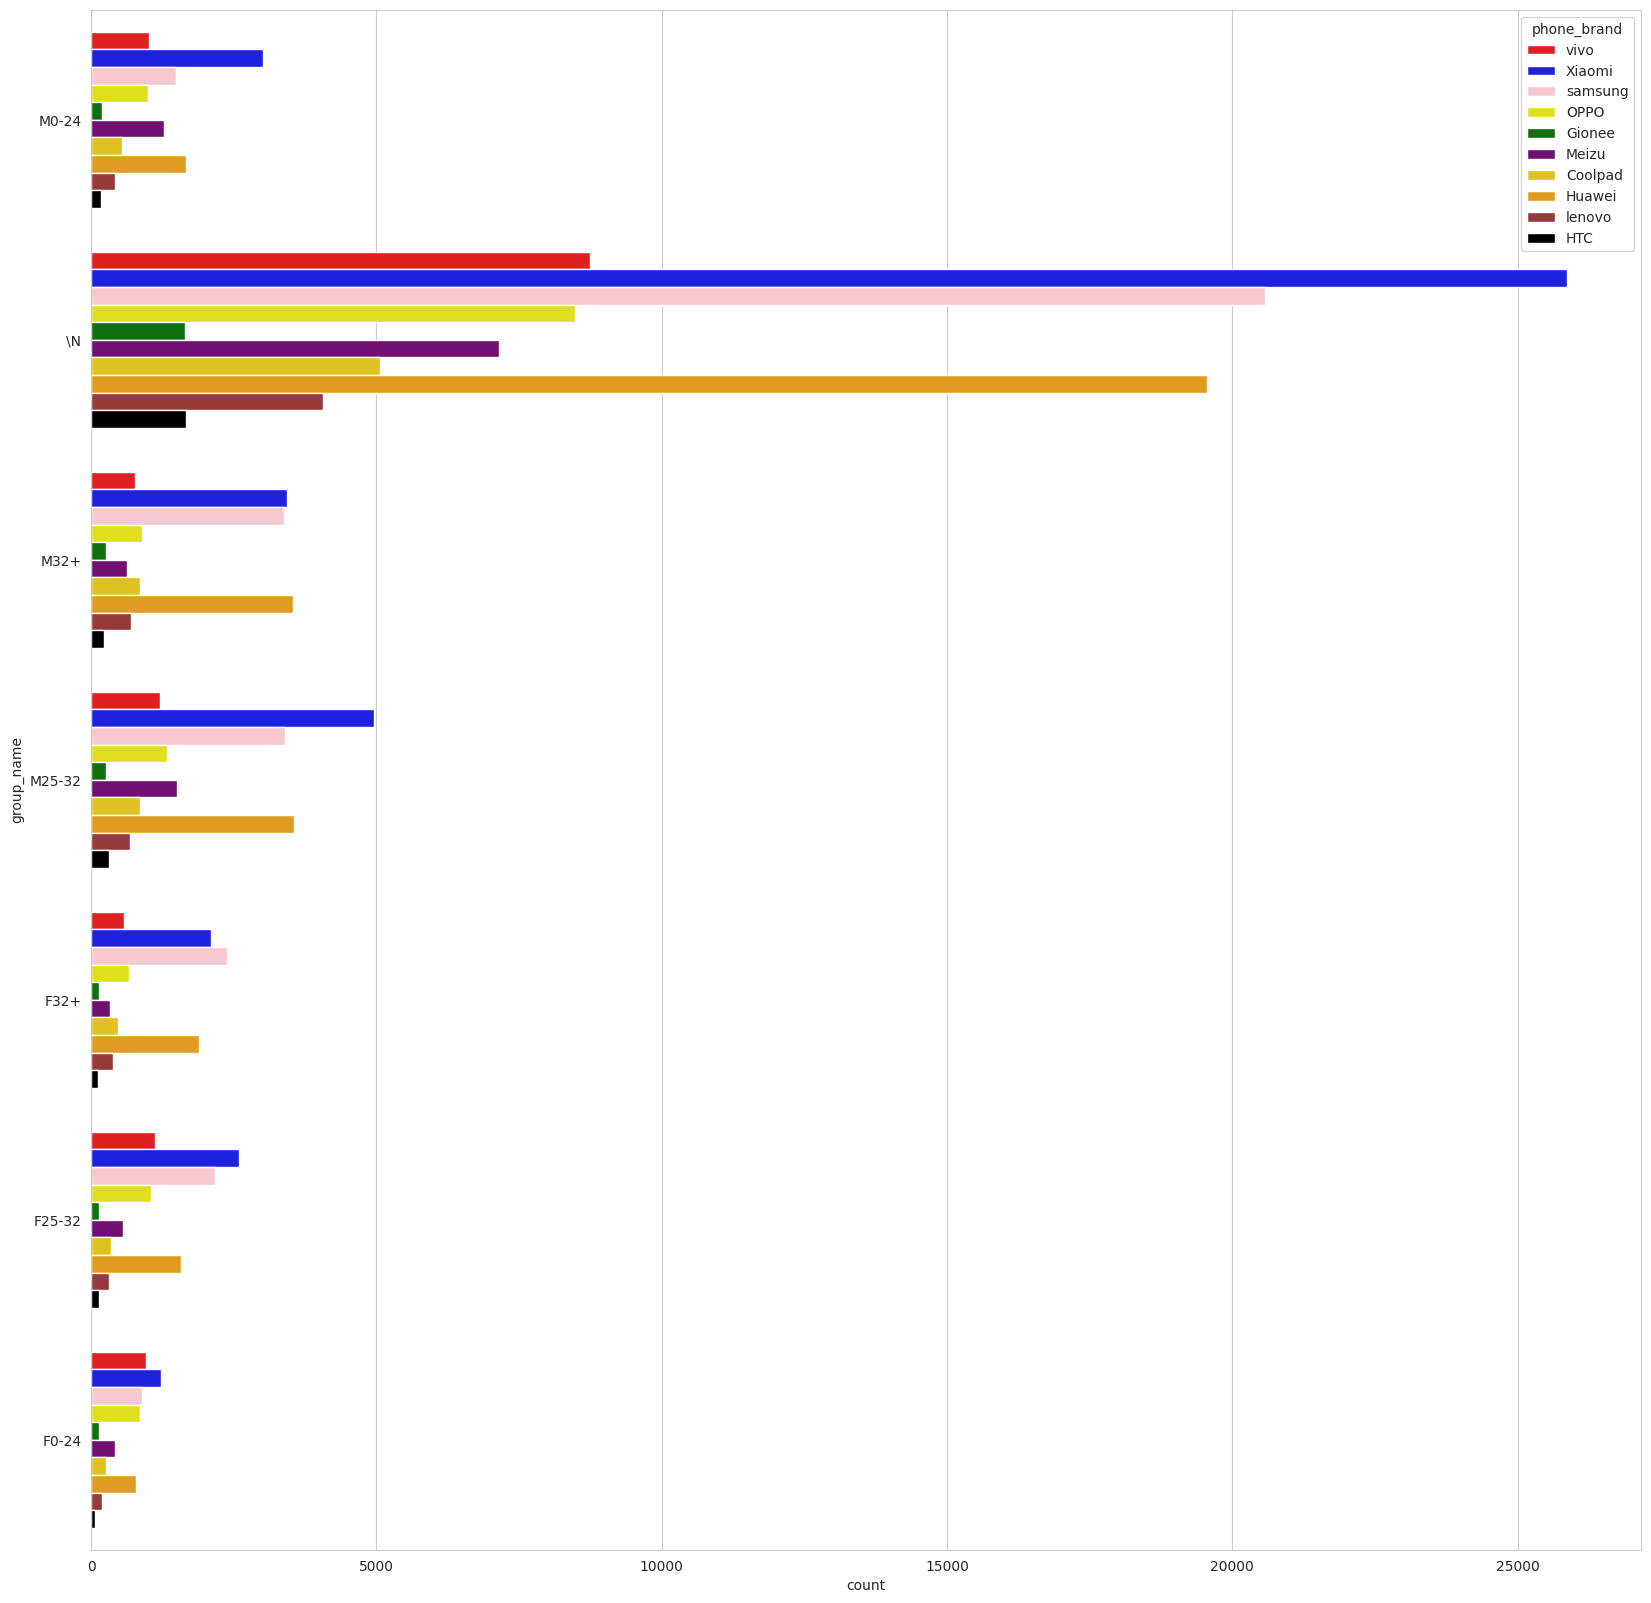

In [45]:
top_mobile_brand_events = customer_group['phone_brand'].value_counts().reset_index().head(10)['index']

plt.figure(figsize=(20,20))
sns.countplot(y="group_name", hue="phone_brand", data=customer_group[customer_group['phone_brand'].isin(top_mobile_brand_events)], palette=colors)

## Feature Engineering tasks

###### -You can create features such as Median Latitude and Median Longitude for different event ids.

In [35]:
#Grouping by event_id and taking the median of latitude
lat_events = train_event_data.groupby("event_id")["latitude"].apply(lambda x: np.median([float(s) for s in x]))
#Grouping by event_id and taking the median of longitude
long_events = train_event_data.groupby("event_id")["longitude"].apply(lambda x: np.median([float(s) for s in x]))
#setting to the original data
train_event_data['event_med_lat']=train_event_data.index.map(lat_events)
train_event_data['event_med_long']=train_event_data.index.map(long_events)
train_event_data.head(10)

,event_id,device_id,event_timestamp,longitude,latitude,gender,age,group_name,event_timestamp_ts,dayofweek,hour,event_med_lat,event_med_long
0,1315995,-9222956879900150000,2016-05-06 15:42:15,113.24,23.19,1,36,M32+,2016-05-06 15:42:15,4,15,NaN,NaN
1,2068832,-9222956879900150000,2016-05-07 12:20:13,113.24,23.19,1,36,M32+,2016-05-07 12:20:13,5,12,31.24,121.38
2,1481001,-9222956879900150000,2016-05-06 15:34:54,113.24,23.19,1,36,M32+,2016-05-06 15:34:54,4,15,NaN,NaN
3,2111353,-9222956879900150000,2016-05-07 12:09:01,113.24,23.19,1,36,M32+,2016-05-07 12:09:01,5,12,29.70,106.60
4,1650018,-9222956879900150000,2016-05-06 15:32:26,113.24,23.19,1,36,M32+,2016-05-06 15:32:26,4,15,23.28,104.27
5,1687118,-9222956879900150000,2016-05-06 15:39:42,113.24,23.19,1,36,M32+,2016-05-06 15:39:42,4,15,28.66,115.88
6,1620692,-9222956879900150000,2016-05-06 20:42:50,113.24,23.19,1,36,M32+,2016-05-06 20:42:50,4,20,0.00,0.00
7,2121199,-9222956879900150000,2016-05-06 20:49:39,0.00,0.00,1,36,M32+,2016-05-06 20:49:39,4,20,NaN,NaN
8,1180650,-9222956879900150000,2016-05-06 15:43:51,113.24,23.19,1,36,M32+,2016-05-06 15:43:51,4,15,NaN,NaN
9,1794538,-9222956879900150000,2016-05-07 07:04:04,113.24,23.19,1,36,M32+,2016-05-07 07:04:04,5,7,NaN,NaN


###### -You can use the information related to the location of the users (latitude and longitude data) to create features representing changes in the latitude and longitude details at different times of the day.

In [36]:
train_event_data['hourbin'] = [1 if ((x>=1)&(x<=6)) else 2 if ((x>=7)&(x<=12)) else 3 if ((x>=13)&(x<=18)) else 4 for x in train_event_data['hour']]
#Grouping by event_id and taking the median of latitude
lat_events_hour = train_event_data.groupby("latitude")["hourbin"].apply(lambda x: " ".join('0'+str(s) for s in x))
#Grouping by event_id and taking the median of longitude
long_events_hour = train_event_data.groupby("longitude")["hourbin"].apply(lambda x: " ".join('0'+str(s) for s in x))
#setting to the original data
train_event_data['hourbin_lat']=train_event_data.index.map(lat_events_hour)
train_event_data['hourbin_long']=train_event_data.index.map(long_events_hour)
train_event_data.head(10)

,event_id,device_id,event_timestamp,longitude,latitude,gender,age,group_name,event_timestamp_ts,dayofweek,hour,event_med_lat,event_med_long,hourbin,hourbin_lat,hourbin_long
0,1315995,-9222956879900150000,2016-05-06 15:42:15,113.24,23.19,1,36,M32+,2016-05-06 15:42:15,4,15,NaN,NaN,3,04 03 03 03 02 03 03 04 04 03 03 02 03 02 02 0...,04 03 03 03 02 03 03 04 04 03 03 02 03 02 02 0...
1,2068832,-9222956879900150000,2016-05-07 12:20:13,113.24,23.19,1,36,M32+,2016-05-07 12:20:13,5,12,31.24,121.38,2,01 02 01 02 02 01 01 02 01 04 01 02 01 04 03 0...,01 02 01 02 02 01 01 02 01 04 01 02 01 04 03 0...
2,1481001,-9222956879900150000,2016-05-06 15:34:54,113.24,23.19,1,36,M32+,2016-05-06 15:34:54,4,15,NaN,NaN,3,NaN,NaN
3,2111353,-9222956879900150000,2016-05-07 12:09:01,113.24,23.19,1,36,M32+,2016-05-07 12:09:01,5,12,29.70,106.60,2,NaN,NaN
4,1650018,-9222956879900150000,2016-05-06 15:32:26,113.24,23.19,1,36,M32+,2016-05-06 15:32:26,4,15,23.28,104.27,3,NaN,NaN
5,1687118,-9222956879900150000,2016-05-06 15:39:42,113.24,23.19,1,36,M32+,2016-05-06 15:39:42,4,15,28.66,115.88,3,NaN,NaN
6,1620692,-9222956879900150000,2016-05-06 20:42:50,113.24,23.19,1,36,M32+,2016-05-06 20:42:50,4,20,0.00,0.00,4,NaN,NaN
7,2121199,-9222956879900150000,2016-05-06 20:49:39,0.00,0.00,1,36,M32+,2016-05-06 20:49:39,4,20,NaN,NaN,4,NaN,NaN
8,1180650,-9222956879900150000,2016-05-06 15:43:51,113.24,23.19,1,36,M32+,2016-05-06 15:43:51,4,15,NaN,NaN,3,NaN,NaN
9,1794538,-9222956879900150000,2016-05-07 07:04:04,113.24,23.19,1,36,M32+,2016-05-07 07:04:04,5,7,NaN,NaN,2,NaN,NaN


##### -Considering the events data, you can create a feature called Average Events, which can give you an estimate of how long the users' mobile phones are active.

In [37]:
#Grouping by event_id and taking the median of latitude
apps_active = train_app_data.groupby(['event_id'])['is_active'].apply(lambda x: np.mean([float(s) for s in x]))
apps_active
#setting to the original data
train_app_data['average_events']=train_app_data.index.map(apps_active)
train_app_data.head(10)

,event_id,app_id,is_installed,is_active,label_id,category,average_events
0,2,-5720078949152207372,1,0,704,Property Industry 2.0,NaN
1,2,-1633887856876571208,1,0,1007,P2P net loan,NaN
2,2,-1633887856876571208,1,0,783,High risk,0.361111
3,2,-1633887856876571208,1,0,779,Higher income,NaN
4,2,-1633887856876571208,1,0,775,Liquid medium,NaN
5,2,5927333115845830913,1,1,172,IM,NaN
6,2,-1633887856876571208,1,0,757,P2P,0.373874
7,2,-1633887856876571208,1,0,756,Internet banking,0.304348
8,2,-1633887856876571208,1,0,730,And the Church,NaN
9,2,-1633887856876571208,1,0,405,Custom label,0.129771


## Advanced Visualisation and Clustering

### Geospatial Visualisation

##### 1. Plot the visualisation plot for a sample of 1 lakh data points.
##### sample 1 lakh data points of lat n long and visualize the data poitns on the map and analyse

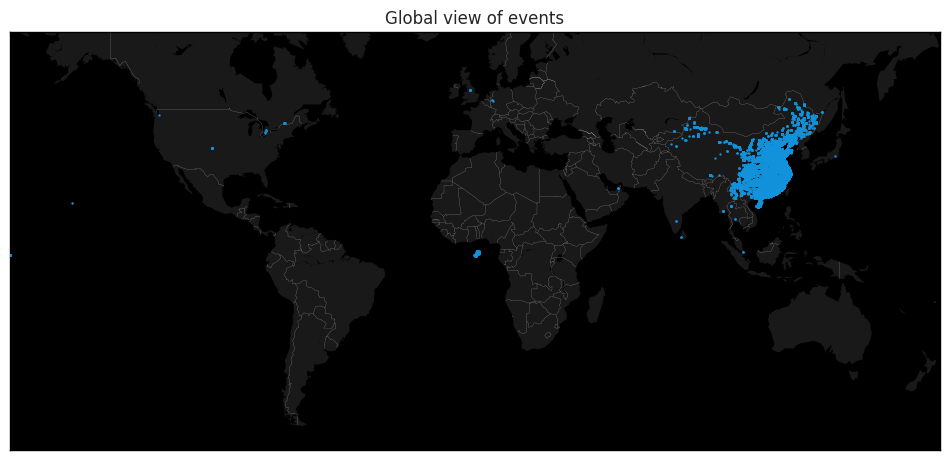

In [49]:
# Set up plot
df_events_sample = train_event_data.sample(n=100000)
plt.figure(1, figsize=(12,6))

# Mercator of World
m1 = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
mxy = m1(df_events_sample["longitude"].tolist(), df_events_sample["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=0, alpha=1, zorder=5)

plt.title("Global view of events")
plt.show()

##### 2. Compare the event visualisation plots based on the users' gender information. [This can be done on the sample of 1 lakh data points.]
##### -sample of 1 lakh points. visualization of several events or differnt lat and long on the map basis the gender info - different plot for male and female and check for differneces

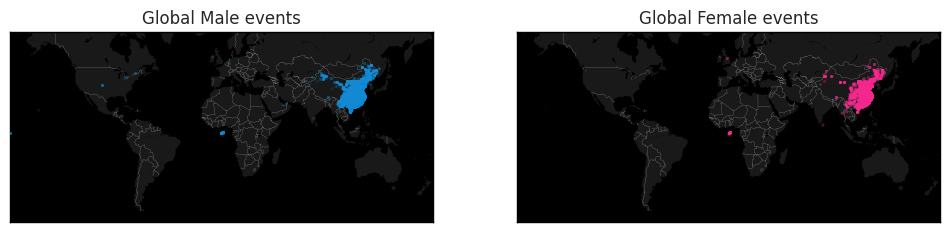

In [50]:
df_m = df_events_sample[df_events_sample["gender"]==1]
df_f = df_events_sample[df_events_sample["gender"]==2]

# Male/female plot
plt.figure(4, figsize=(12,6))

plt.subplot(121)
m4a = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')
m4a.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m4a.drawmapboundary(fill_color='#000000')                # black background
m4a.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders
mxy = m4a(df_m["longitude"].tolist(), df_m["latitude"].tolist())
m4a.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.1, zorder=5)
plt.title("Global Male events")

plt.subplot(122)
m4b = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')
m4b.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m4b.drawmapboundary(fill_color='#000000')                # black background
m4b.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders
mxy = m4b(df_f["longitude"].tolist(), df_f["latitude"].tolist())
m4b.scatter(mxy[0], mxy[1], s=5, c="#fd3096", lw=0, alpha=0.1, zorder=5)
plt.title("Global Female events")

plt.show()

##### 3. Compare the event visualisation plots based on the following age groups:
        a)	0–24 
        b)	25–32
        c)	32+

In [51]:
df_events_sample.group_name.unique()

array(['M32+', 'M25-32', 'F32+', 'M0-24', 'F25-32', 'F0-24'], dtype=object)

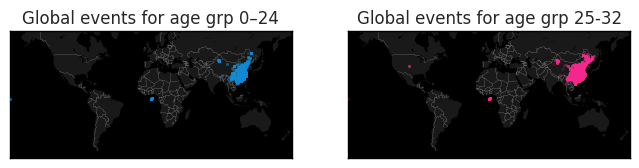

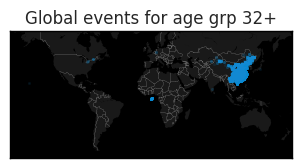

In [52]:
df_M024 = df_events_sample[df_events_sample["group_name"]=='M0-24']
df_F024 = df_events_sample[df_events_sample["group_name"]=='F0-24']
df_M024.append(df_F024)

df_M2532 = df_events_sample[df_events_sample["group_name"]=='M25-32']
df_F2532 = df_events_sample[df_events_sample["group_name"]=='F25-32']
df_M2532.append(df_F2532)

df_M32 = df_events_sample[df_events_sample["group_name"]=='M32+']
df_F32 = df_events_sample[df_events_sample["group_name"]=='F32+']
df_M32.append(df_F32)

# 0-24 plot
plt.figure(5, figsize=(8,6))

plt.subplot(121)
m4a = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')
m4a.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m4a.drawmapboundary(fill_color='#000000')                # black background
m4a.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders
mxy = m4a(df_M024["longitude"].tolist(), df_M024["latitude"].tolist())
m4a.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.1, zorder=5)
plt.title("Global events for age grp 0–24")

plt.subplot(122)
# 25-32 plot
m4b = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')
m4b.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m4b.drawmapboundary(fill_color='#000000')                # black background
m4b.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders
mxy = m4b(df_M2532["longitude"].tolist(), df_M2532["latitude"].tolist())
m4b.scatter(mxy[0], mxy[1], s=5, c="#fd3096", lw=0, alpha=0.1, zorder=5)
plt.title("Global events for age grp 25-32")

plt.show()

#32+ plot
plt.figure(5, figsize=(8,6))

plt.subplot(121)
m4a = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')
m4a.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m4a.drawmapboundary(fill_color='#000000')                # black background
m4a.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders
mxy = m4a(df_M32["longitude"].tolist(), df_M32["latitude"].tolist())
m4a.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.1, zorder=5)
plt.title("Global events for age grp 32+")

plt.show()

### DBSCAN Clustering as a preprocessing technique
 on latitude and longitude data

In [53]:
#!pip3 install scikit-learn
#!pip3 install geopy
#!pip3 install shapely

In [6]:
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
#coords = train_event_data[['latitude','longitude']].to_numpy()

In [55]:
kms_per_radian = 6371.0088
epsilon = 1.5/kms_per_radian
db = DBSCAN(eps= 0.5, min_samples= 10, algorithm = 'ball_tree', metric = 'haversine').fit(np.radians(coords))

In [56]:
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)

lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'longitude':lons, 'latitude':lats})

rs = rep_points.apply(lambda row: train_event_data[(train_event_data['latitude']==row['latitude']) &amp;&amp; (df['longitude']==row['longitude'])].iloc[0], axis=1)

### Final Data Preparation and Train-Test Splitting
      Convert categorical data to numerical data
      -one hot/label encoding from pandas
      -csr matrix from scipy - sparse matrix
      -use the mapping file to split the device ids in train and device ids in test

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [39]:
# Get rid of duplicate device ids in phone
train_non_event_data = train_non_event_data.drop_duplicates('device_id',keep='first').set_index('device_id') 

In [40]:
# Encoding the brands using LabelEncoder
enc_brand = LabelEncoder().fit(train_non_event_data['phone_brand'])
train_non_event_data['enc_brand'] = enc_brand.transform(train_non_event_data['phone_brand'])
nbrands=len(enc_brand.classes_)# number of unique apps it will be used in creating One-Hot Encoding of Brands

#Concatinating Phone Brand and Model 
concat_model = train_non_event_data['phone_brand'].str.cat(train_non_event_data['device_model'])
#Converting Categorical Maodel in phone data  to Integers from 0 to number of unique models -1
model_encoder=LabelEncoder().fit(concat_model)
train_non_event_data['enc_model_brand']=model_encoder.transform(concat_model)
nmodels=len(model_encoder.classes_)# number of unique apps it will be used in creating One-Hot Encoding of Models

In [41]:
train_non_event_data.head(10)

,phone_brand,device_model,gender,age,group_name,enc_brand,enc_model_brand
device_id,,,,,,,
-9223067244542180000,vivo,Y19T,1,24,M0-24,88,1593
-9223042152723780000,Xiaomi,MI 3,0,0,\N,37,745
-9222956879900150000,samsung,Galaxy Note 2,1,36,M32+,86,1435
-9222896629442490000,OPPO,A31,0,0,\N,24,577
-9222894989445030000,Gionee,ELIFE E7 Mini,0,0,\N,9,189
-9222894319703300000,Meizu,MX3,0,0,\N,21,550
-9222754701995930000,Coolpad,8730L,1,29,M25-32,6,139
-9222661944218800000,vivo,Y913,0,0,\N,88,1614
-9222399302879210000,Xiaomi,MI 3,0,0,\N,37,745


In [42]:
# Encoding the device models using LabelEncoder same way as done for Brands
enc_model = LabelEncoder().fit(train_non_event_data['device_model'])
train_non_event_data['enc_model'] = enc_model.transform(train_non_event_data['device_model'])

In [43]:
train_non_event_data.head(10)

,phone_brand,device_model,gender,age,group_name,enc_brand,enc_model_brand,enc_model
device_id,,,,,,,,
-9223067244542180000,vivo,Y19T,1,24,M0-24,88,1593,1342
-9223042152723780000,Xiaomi,MI 3,0,0,\N,37,745,759
-9222956879900150000,samsung,Galaxy Note 2,1,36,M32+,86,1435,542
-9222896629442490000,OPPO,A31,0,0,\N,24,577,162
-9222894989445030000,Gionee,ELIFE E7 Mini,0,0,\N,9,189,394
-9222894319703300000,Meizu,MX3,0,0,\N,21,550,776
-9222754701995930000,Coolpad,8730L,1,29,M25-32,6,139,127
-9222661944218800000,vivo,Y913,0,0,\N,88,1614,1393
-9222399302879210000,Xiaomi,MI 3,0,0,\N,37,745,759


In [44]:
# Encoding the device models using LabelEncoder same way as done for Brands
enc_model = LabelEncoder().fit(train_non_event_data['group_name'])
train_non_event_data['enc_group_name'] = enc_model.transform(train_non_event_data['group_name'])

In [45]:
#dropping columns with categorical data after one hot encoding of these columns
train_non_event_data.drop(['phone_brand','device_model','group_name'],axis=1, inplace=True)
train_non_event_data.fillna('0')
train_non_event_data.head(10)

,gender,age,enc_brand,enc_model_brand,enc_model,enc_group_name
device_id,,,,,,
-9223067244542180000,1,24,88,1593,1342,3
-9223042152723780000,0,0,37,745,759,6
-9222956879900150000,1,36,86,1435,542,5
-9222896629442490000,0,0,24,577,162,6
-9222894989445030000,0,0,9,189,394,6
-9222894319703300000,0,0,21,550,776,6
-9222754701995930000,1,29,6,139,127,4
-9222661944218800000,0,0,88,1614,1393,6
-9222399302879210000,0,0,37,745,759,6


In [46]:
#dropping columns timestamp,timestamp_ts,
train_event_data.drop(['event_timestamp','event_timestamp_ts'],axis=1, inplace=True)
# Encoding the device models using LabelEncoder same way as done for Brands
enc_model = LabelEncoder().fit(train_event_data['group_name'])
train_event_data['enc_group_name'] = enc_model.transform(train_event_data['group_name'])
train_event_data.fillna('0')
train_event_data.drop('group_name',axis=1, inplace=True)
train_event_data.head(10)

,event_id,device_id,longitude,latitude,gender,age,dayofweek,hour,event_med_lat,event_med_long,hourbin,hourbin_lat,hourbin_long,enc_group_name
0,1315995,-9222956879900150000,113.24,23.19,1,36,4,15,NaN,NaN,3,04 03 03 03 02 03 03 04 04 03 03 02 03 02 02 0...,04 03 03 03 02 03 03 04 04 03 03 02 03 02 02 0...,5
1,2068832,-9222956879900150000,113.24,23.19,1,36,5,12,31.24,121.38,2,01 02 01 02 02 01 01 02 01 04 01 02 01 04 03 0...,01 02 01 02 02 01 01 02 01 04 01 02 01 04 03 0...,5
2,1481001,-9222956879900150000,113.24,23.19,1,36,4,15,NaN,NaN,3,NaN,NaN,5
3,2111353,-9222956879900150000,113.24,23.19,1,36,5,12,29.70,106.60,2,NaN,NaN,5
4,1650018,-9222956879900150000,113.24,23.19,1,36,4,15,23.28,104.27,3,NaN,NaN,5
5,1687118,-9222956879900150000,113.24,23.19,1,36,4,15,28.66,115.88,3,NaN,NaN,5
6,1620692,-9222956879900150000,113.24,23.19,1,36,4,20,0.00,0.00,4,NaN,NaN,5
7,2121199,-9222956879900150000,0.00,0.00,1,36,4,20,NaN,NaN,4,NaN,NaN,5
8,1180650,-9222956879900150000,113.24,23.19,1,36,4,15,NaN,NaN,3,NaN,NaN,5
9,1794538,-9222956879900150000,113.24,23.19,1,36,5,7,NaN,NaN,2,NaN,NaN,5


In [47]:
train_app_data.drop(['is_installed','category'],axis=1, inplace=True)
# Encoding the category using LabelEncoder same way as done for Brands
#enc_model = LabelEncoder().fit(train_app_data['category'])
#train_app_data['enc_category'] = enc_model.transform(train_app_data['category'])
#train_app_data = train_app_data.drop('category',axis=1)
#train_app_data = train_app_data.fillna('0')
#train_app_data.head(10)

In [48]:
#read the test nd train data and divide the data for events and without events
train_test_data = pd.read_csv('train_test_split.csv')
train_data = train_test_data[train_test_data['train_test_flag']=='train']
test_data = train_test_data[train_test_data['train_test_flag']=='test']

In [49]:
class_encoder=LabelEncoder()
encoded_y=class_encoder.fit_transform(train_data['group'])
print("Number of Classes: ",len(class_encoder.classes_))
print("Classes: ",class_encoder.classes_)
# printing how each class label is encoded as 
print("Class Encoding: ", class_encoder.transform(class_encoder.classes_))

Number of Classes:  6
Classes:  ['F0-24' 'F25-32' 'F32+' 'M0-24' 'M25-32' 'M32+']
Class Encoding:  [0 1 2 3 4 5]


In [50]:
train_data['Class']=encoded_y

In [51]:
#checking and extracting the Device Ids which have Event Details for Train Data
train_devices_have_events=np.in1d(train_data.device_id.values,train_event_data.device_id.values)

train_data['has_events']=train_devices_have_events
train_data['has_events'].value_counts()

#checking and extracting the Device Ids which have Event Details for Test Data
test_devices_have_events=np.in1d(test_data['device_id'].values,train_event_data['device_id'].values)

test_data['has_events']=test_devices_have_events
test_data['has_events'].value_counts()

train_data.to_csv('Train_Data_Event_Flag.csv')
test_data.to_csv('Test_Data_Event_Flag.csv')

In [52]:
train_data=pd.read_csv('Train_Data_Event_Flag.csv')
test_data=pd.read_csv('Test_Data_Event_Flag.csv')

train_data.drop(['Unnamed: 0'],axis=1,inplace=True)
test_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [53]:
events_train_data=train_data.loc[train_data['has_events']==True]
events_test_data=test_data.loc[test_data['has_events']==True]

In [54]:
noevents_train_data=train_data.loc[train_data['has_events']==False]
noevents_test_data=test_data.loc[test_data['has_events']==False]

In [55]:
#Setting device_id as index for Train, Test Data

train_data=train_data.set_index('device_id')
test_data=test_data.set_index('device_id')
events_train_data=events_train_data.set_index('device_id')
events_test_data=events_test_data.set_index('device_id')
noevents_train_data=noevents_train_data.set_index('device_id')
noevents_test_data=noevents_test_data.set_index('device_id')

In [56]:
#We will create coloumns trainrow, testrow in Train and Test Data to indicate which row a particular device belongs
#to and this will be useful in our One-hot encoded Sparse Matrix Creation, in which we will specify number of rows 
#in the sparse matrix

train_data['trainrow'] = np.arange(train_data.shape[0])
test_data['testrow'] = np.arange(test_data.shape[0])
events_train_data['trainrow']=np.arange(events_train_data.shape[0])
events_test_data['testrow']=np.arange(events_test_data.shape[0])
noevents_train_data['trainrow']=np.arange(noevents_train_data.shape[0])
noevents_test_data['testrow']=np.arange(noevents_test_data.shape[0])

In [57]:
train_data['brand'] = train_non_event_data['enc_brand'] 
test_data['brand'] = train_non_event_data['enc_brand']
events_train_data['phone_brand'] = train_non_event_data['enc_brand']
events_test_data['phone_brand'] = train_non_event_data['enc_brand']
noevents_train_data['brand'] = train_non_event_data['enc_brand']
noevents_test_data['brand'] = train_non_event_data['enc_brand']


# Getting the csr matrix from the encoded labels for events data
Xtr_brand = csr_matrix((np.ones(train_data.shape[0]), 
                       (train_data.trainrow, train_data.brand)))
Xte_brand = csr_matrix((np.ones(test_data.shape[0]), 
                       (test_data.testrow, test_data.brand)))

Xtr_events_brand = csr_matrix((np.ones(events_train_data.shape[0]), # Number of Rows/Devices
                       (events_train_data.trainrow, events_train_data.phone_brand)), 
                              shape=(events_train_data.shape[0],nbrands))
Xte_events_brand = csr_matrix((np.ones(events_test_data.shape[0]), # Number of Rows/Devices
                       (events_test_data.testrow, events_test_data.phone_brand)),
                             shape=(events_test_data.shape[0],nbrands))
print("Train Brand One-hot Shape: ",Xtr_events_brand.shape)
print("Test Brand One-hot Shape: ",Xte_events_brand.shape)

# Getting the csr matrix from the encoded labels for no events data
Xtr_noevents_brand = csr_matrix((np.ones(noevents_train_data.shape[0]), 
                       (noevents_train_data.trainrow, noevents_train_data.brand)))
Xte_noevents_brand = csr_matrix((np.ones(noevents_test_data.shape[0]), 
                       (noevents_test_data.testrow, noevents_test_data.brand)))
print("Train Brand One-hot Shape(events): ",Xtr_brand.shape)
print("Test Brand One-hot Shape(events): ",Xte_brand.shape)

print("Train Brand One-hot Shape(no-events): ",Xtr_noevents_brand.shape)
print("Test Brand One-hot Shape(no-events): ",Xtr_noevents_brand.shape)

Train Brand One-hot Shape:  (17482, 97)
Test Brand One-hot Shape:  (5828, 97)
Train Brand One-hot Shape(events):  (58549, 97)
Test Brand One-hot Shape(events):  (16096, 97)
Train Brand One-hot Shape(no-events):  (41067, 97)
Test Brand One-hot Shape(no-events):  (41067, 97)


#### Preparing data events

In [58]:
# As both of these dataframes have the same indices, the encoded brands will get assigned to the specific device_ids
train_data['model'] = train_non_event_data['enc_model']
test_data['model'] = train_non_event_data['enc_model']
events_train_data['phone_model'] = train_non_event_data['enc_model_brand']
events_test_data['phone_model'] = train_non_event_data['enc_model_brand']
noevents_train_data['model'] = train_non_event_data['enc_model']
noevents_test_data['model'] = train_non_event_data['enc_model']

# Getting the csr matrix from the encoded labels
Xtr_model = csr_matrix((np.ones(train_data.shape[0]), 
                       (train_data.trainrow, train_data.model)))
Xte_model = csr_matrix((np.ones(test_data.shape[0]), 
                       (test_data.testrow, test_data.model)))

Xtr_events_model = csr_matrix((np.ones(events_train_data.shape[0]), # Number of Rows/Devices
                       (events_train_data.trainrow, events_train_data.phone_model)),
                         shape=(events_train_data.shape[0],nmodels))
Xte_events_model = csr_matrix((np.ones(events_test_data.shape[0]), # Number of Rows/Devices
                       (events_test_data.testrow, events_test_data.phone_model)),
                           shape=(events_test_data.shape[0],nmodels))
print("Train Model One-hot Shape: ",Xtr_events_model.shape)
print("Test Model One-hot Shape: ",Xte_events_model.shape)

# Getting the csr matrix from the encoded labels
Xtr_noevents_model = csr_matrix((np.ones(noevents_train_data.shape[0]), 
                       (noevents_train_data.trainrow, noevents_train_data.model)))
Xte_noevents_model = csr_matrix((np.ones(noevents_test_data.shape[0]), 
                       (noevents_test_data.testrow, noevents_test_data.model)))
print("Train Brand One-hot Shape(events): ",Xtr_model.shape)
print("Test Brand One-hot Shape(events): ",Xte_model.shape)

print("Train Brand One-hot Shape(no-events): ",Xtr_noevents_model.shape)
print("Test Brand One-hot Shape(no-events): ",Xtr_noevents_model.shape)

Train Model One-hot Shape:  (17482, 1665)
Test Model One-hot Shape:  (5828, 1665)
Train Brand One-hot Shape(events):  (58549, 1599)
Test Brand One-hot Shape(events):  (16096, 1599)
Train Brand One-hot Shape(no-events):  (41067, 1599)
Test Brand One-hot Shape(no-events):  (41067, 1599)


In [59]:
#one hot encode of app_id
app_encoder = LabelEncoder().fit(train_app_data['app_id'])
train_app_data['app'] = app_encoder.transform(train_app_data['app_id'])
napps = len(app_encoder.classes_)# number of unique apps it will be used in creating One-Hot Encoding of Apps 

# Then we merge the app data with device_id column from the events data dataframe grouping by device_id and encoded app_ids.
# Finally we merge it with trainrow and testrow columns to understand at which row we should put each device in features matrix.
deviceapps = (train_app_data.merge(train_event_data[['device_id']], how='left',left_on='event_id',right_index=True)
                       .groupby(['device_id','app'])['app'].agg(['size'])
                       .merge(events_train_data[['trainrow']], how='left', left_index=True, right_index=True)
                       .merge(events_test_data[['testrow']], how='left', left_index=True, right_index=True)
                       .reset_index())

In [60]:
# Getting the csr matrix for Apps
d = deviceapps.dropna(subset=['trainrow'])
Xtr_event_app = csr_matrix((np.ones(d.shape[0]), (d.trainrow, d.app)), 
                      shape=(events_train_data.shape[0],napps))
d = deviceapps.dropna(subset=['testrow'])
Xte_event_app = csr_matrix((np.ones(d.shape[0]), (d.testrow, d.app)), 
                      shape=(events_test_data.shape[0],napps))
print('Apps data: train shape {}, test shape {}'.format(Xtr_event_app.shape, Xte_event_app.shape))

Apps data: train shape (17482, 19237), test shape (5828, 19237)


In [61]:
enc_labels = LabelEncoder().fit(train_app_data['label_id'])
train_app_data['enc_label'] = enc_labels.transform(train_app_data['label_id'])
#Getting the number of classes in encoded labels
nlabels = len(enc_labels.classes_)

# Merging device apps with app labels and train and test data
devicelabels = (deviceapps[['device_id','app']]
                .merge(train_app_data[['app','enc_label']])
                .groupby(['device_id','enc_label'])['app'].agg(['size'])
                .merge(events_train_data[['trainrow']], how='left', left_index=True, right_index=True)
                .merge(events_test_data[['testrow']], how='left', left_index=True, right_index=True)
                .reset_index())

MemoryError: Unable to allocate 13.4 TiB for an array with shape (1839403945757,) and data type int64

In [62]:
d = devicelabels.dropna(subset=['trainrow'])
Xtr_events_label = csr_matrix((np.ones(d.shape[0]), (d.trainrow, d.label)), 
                      shape=(events_train_data.shape[0],nlabels))
#Since the Devicelabels has both train and test columns merged to create Test Labels One-Hot we will Drop all Nan of Test Row
#Once we remove Nan in Test Rows we will get the Labels in Test Data and we create CSR Matrix for those rows
d = devicelabels.dropna(subset=['testrow'])
Xte_events_label = csr_matrix((np.ones(d.shape[0]), (d.testrow, d.label)), 
                      shape=(events_test_data.shape[0],nlabels))
print("Train Event Labels One-hot Shape: ",Xtr_events_label.shape)
print("Test Event Labels One-hot Shape: ",Xte_events_label.shape)

NameError: name 'devicelabels' is not defined

In [63]:
# In hourevents, we get a string of all the hours at which events were recorded for a specific device
hourevents = train_event_data.groupby("device_id")["hour"].apply(lambda x: " ".join('0'+str(s) for s in x))
#hourevents = hourevents.reset_index().set_index('device_id')

# In hourbins, we get a string of all the hours at which events were recorded for a specific device
hourbins = train_event_data.groupby("device_id")["hourbin"].apply(lambda x: " ".join('0'+str(s) for s in x))
#hourbins = hourbins.reset_index().set_index('device_id')

# Mapping hour from hourevents to train and test data
#train_data['event_hours'] = hourevents['hour']
#test_data['event_hours'] = hourevents['hour']

#train_data['event_hourbins'] = hourbins['hourbin']
#test_data['event_hourbins'] = hourbins['hourbin']

#Mapping The Values the values to train and test dataframes
events_train_data['event_hours']=events_train_data.index.map(hourevents)
events_test_data['event_hours']=events_test_data.index.map(hourevents)
events_train_data['event_hourbins']=events_train_data.index.map(hourbins)
events_test_data['event_hourbins']=events_test_data.index.map(hourbins)

In [64]:
# As there are devices which don't have any recorded events, so we fill the NaN values with '0'
train_data = train_data.fillna('0')
test_data = test_data.fillna('0')

In [65]:
# Tfidf vectorizer for event hours
vectorizer_hours = TfidfVectorizer()
vectorizer_hours.fit(events_train_data['event_hours'].values)
vectorizer_hours.fit(events_train_data['event_hourbins'].values)

X_tr_event_hours_one_hot = vectorizer_hours.transform(events_train_data['event_hours'].values)
X_te_event_hours_one_hot = vectorizer_hours.transform(events_test_data['event_hours'].values)

X_tr_event_hours_bins_one_hot = vectorizer_hours.transform(events_train_data['event_hourbins'].values)
X_te_event_hours_bins_one_hot = vectorizer_hours.transform(events_test_data['event_hourbins'].values)

print("Train shape : ",X_tr_event_hours_one_hot.shape)
print("Test shape : ",X_te_event_hours_one_hot.shape)

Train shape :  (17482, 4)
Test shape :  (5828, 4)


In [67]:
print("Train shape : ",X_tr_event_hours_bins_one_hot.shape)
print("Test shape : ",X_te_event_hours_bins_one_hot.shape)

Train shape :  (17482, 4)
Test shape :  (5828, 4)


In [68]:
# In dayevents, we get a string of all the days at which events were recorded for a specific device
dayevents = train_event_data.groupby("device_id")["dayofweek"].apply(lambda x: " ".join('0'+str(s) for s in x))
#dayevents = dayevents.reset_index().set_index('device_id')

In [69]:
# Mapping dayofweek from dayevents to train and test data
#train_data['event_day'] = dayevents['dayofweek']
#test_data['event_day'] = dayevents['dayofweek']

#Mapping The Values the values to train and test dataframes
events_train_data['event_day']=events_train_data.index.map(dayevents)
events_test_data['event_day']=events_test_data.index.map(dayevents)

# As there are devices which don't have any recorded events, so we fill the NaN values with '0'
train_data = train_data.fillna('0')
test_data = test_data.fillna('0')

In [70]:
# Tfidf vectorizer for event day
vectorizer_day = TfidfVectorizer()
vectorizer_day.fit(events_train_data['event_day'].values)

X_tr_event_day_one_hot = vectorizer_day.transform(events_train_data['event_day'].values)
X_te_event_day_one_hot = vectorizer_day.transform(events_test_data['event_day'].values)

print("Train shape : ",X_tr_event_day_one_hot.shape)
print("Test shape : ",X_te_event_day_one_hot.shape)

Train shape :  (17482, 7)
Test shape :  (5828, 7)


In [71]:
# Now we get a list of the activity status of an app when the event was recorded
appsactive = train_app_data.groupby(['event_id'])['is_active'].apply(lambda x: " ".join(str(s) for s in x))
#.reset_index().set_index('event_id')
#Mapping apps is_active to device_id
train_event_data["apps_active"] = train_event_data.index.map(appsactive)
events_apps_active_map = train_event_data.groupby("device_id")["apps_active"].apply(lambda x: " ".join(str(s) for s in x if str(s)!='nan'))
events_apps_active_map.head()

device_id
-9222956879900150000    0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 ...
-9221026417907250000    1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 ...
-9220830859283100000    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
-9220061629197650000    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
-9218960997324660000    1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 ...
Name: apps_active, dtype: object

In [72]:
# Mapping apps_active from events_apps_active to train and test data
#train_data['apps_active'] = events_apps_active['apps_active']
#test_data['apps_active'] = events_apps_active['apps_active']
#Mapping The Values the values to train and test dataframes
events_train_data['apps_active']=events_train_data.index.map(events_apps_active_map)
events_test_data['apps_active']=events_test_data.index.map(events_apps_active_map)

# As there are devices which don't have any recorded events, so we fill the NaN values with '0'
train_data = train_data.fillna('0')
test_data = test_data.fillna('0')

# Tfidf vectorizer for apps_active
vectorizer_8=TfidfVectorizer(token_pattern='(?u)\\b\\w+\\b')
vectorizer_8.fit(events_train_data['apps_active'].values)

X_tr_apps_active_one_hot = vectorizer_8.transform(events_train_data['apps_active'].values)
X_te_apps_active_one_hot = vectorizer_8.transform(events_test_data['apps_active'].values)
print("Train Apps Active One-hot Shape: ",X_tr_apps_active_one_hot.shape)
print("Test Apps Active One-hot Shape: ",X_te_apps_active_one_hot.shape)

Train Apps Active One-hot Shape:  (17482, 2)
Test Apps Active One-hot Shape:  (5828, 2)


In [73]:
#train_data['event_med_lat'] = lat_events['event_med_lat']
#test_data['event_med_lat'] = lat_events['event_med_lat']

#train_data['event_med_long'] = long_events['event_med_long']
#test_data['event_med_long'] = long_events['event_med_long']

events_train_data['event_med_lat']=events_train_data.index.map(lat_events)
events_test_data['event_med_lat']=events_test_data.index.map(lat_events)

events_train_data['event_med_long']=events_train_data.index.map(long_events)
events_test_data['event_med_long']=events_test_data.index.map(long_events)

#train_data['hourbin_lat'] = lat_events_hour['hourbin_lat']
#test_data['hourbin_lat'] = lat_events_hour['hourbin_lat']

#train_data['hourbin_long'] = long_events_hour['hourbin_long']
#test_data['hourbin_long'] = long_events_hour['hourbin_long']

events_train_data['hourbin_lat']=events_train_data.index.map(lat_events_hour)
events_test_data['hourbin_lat']=events_test_data.index.map(lat_events_hour)

events_train_data['hourbin_long']=events_train_data.index.map(long_events_hour)
events_test_data['hourbin_long']=events_test_data.index.map(long_events_hour)

In [74]:
#standardizing lat
scaler_1=StandardScaler()
scaler_1.fit(events_train_data['event_med_lat'].values.reshape(-1,1))

X_tr_event_med_lat_scaled = scaler_1.transform(events_train_data['event_med_lat'].values.reshape(-1,1))
X_te_event_med_lat_scaled = scaler_1.transform(events_test_data['event_med_lat'].values.reshape(-1,1))
print("After Standardizing")
print("Train Event Latitude Standardized Shape: ",X_tr_event_med_lat_scaled.shape)
print("Test Event Latitude Standardized  Shape: ",X_te_event_med_lat_scaled.shape)

After Standardizing
Train Event Latitude Standardized Shape:  (17482, 1)
Test Event Latitude Standardized  Shape:  (5828, 1)


In [75]:
#standardizing long
scaler_2=StandardScaler()
scaler_2.fit(events_train_data['event_med_long'].values.reshape(-1,1))

X_tr_event_med_long_scaled = scaler_2.transform(events_train_data['event_med_long'].values.reshape(-1,1))
X_te_event_med_long_scaled = scaler_2.transform(events_test_data['event_med_long'].values.reshape(-1,1))
print("After Standardizing")
print("Train Event Longitude Standardized Shape: ",X_tr_event_med_long_scaled.shape)
print("Test Event Longitude Standardized  Shape: ",X_te_event_med_long_scaled.shape)

After Standardizing
Train Event Longitude Standardized Shape:  (17482, 1)
Test Event Longitude Standardized  Shape:  (5828, 1)


In [76]:
#Converting to Sparse Matrices
X_tr_event_hours_one_hot=X_tr_event_hours_one_hot.tocsr()
X_te_event_hours_one_hot=X_te_event_hours_one_hot.tocsr()

X_tr_event_hours_bins_one_hot=X_tr_event_hours_bins_one_hot.tocsr()
X_te_event_hours_bins_one_hot=X_te_event_hours_bins_one_hot.tocsr()

X_tr_event_day_one_hot=X_tr_event_day_one_hot.tocsr()
X_te_event_day_one_hot=X_te_event_day_one_hot.tocsr()

X_tr_apps_active_one_hot=X_tr_apps_active_one_hot.tocsr()
X_te_apps_active_one_hot=X_te_apps_active_one_hot.tocsr()

X_train_events_one_hot_1=hstack((Xtr_events_brand,Xtr_events_model,X_tr_event_hours_one_hot,X_tr_event_hours_bins_one_hot,X_tr_event_day_one_hot,X_tr_event_med_lat_scaled,X_tr_event_med_long_scaled,Xtr_event_app,X_tr_apps_active_one_hot),format='csr')
X_test_events_one_hot_1=hstack((Xte_events_brand,Xte_events_model,X_te_event_hours_one_hot,X_te_event_hours_bins_one_hot,X_te_event_day_one_hot,X_te_event_med_lat_scaled,X_te_event_med_long_scaled,Xte_event_app,X_te_apps_active_one_hot),format='csr')

In [77]:
# Stacking all the features together for GENDER/AGE analysis ---- WITH EVENTS
X_train_gender = hstack((Xtr_events_brand,Xtr_events_model,X_tr_event_hours_one_hot,X_tr_event_hours_bins_one_hot,X_tr_event_day_one_hot,X_tr_event_med_lat_scaled,X_tr_event_med_long_scaled,Xtr_event_app,X_tr_apps_active_one_hot),format='csr')

X_test_gender = hstack((Xte_events_brand,Xte_events_model,X_te_event_hours_one_hot,X_te_event_hours_bins_one_hot,X_te_event_day_one_hot,X_te_event_med_lat_scaled,X_te_event_med_long_scaled,Xte_event_app,X_te_apps_active_one_hot),format='csr')

print("X_train_gender (with events) shape ",X_train_gender.shape)
print("X_test_gender (with events) shape ",X_test_gender.shape)

X_train_gender (with events) shape  (17482, 21018)
X_test_gender (with events) shape  (5828, 21018)


In [78]:
# Stacking all the features together - GENDER/AGE analysis WITHOUT EVENTS
X_ntrain_gender = hstack((Xtr_brand,Xtr_model),format='csr')

X_ntest_gender = hstack((Xte_brand,Xte_model),format='csr')

print("X_train_gender (without events) shape ",X_ntrain_gender.shape)
print("X_test_gender (without events) shape ",X_ntest_gender.shape)

X_train_gender (without events) shape  (58549, 1696)
X_test_gender (without events) shape  (16096, 1696)


In [79]:
#X_train_noevents_one_hot=hstack((Xtr_noevents_brand,Xtr_noevents_model),format='csr')
#X_test_noevents_one_hot=hstack((Xte_noevents_brand,Xte_noevents_model),format='csr')

#print("Final One-hot Encoded Data matrix")
#print(X_train_noevents_one_hot.shape)
#print(X_test_noevents_one_hot.shape)

#Saving One-hot encoded Matrices
#save_sparse('Train_Noevents_One_hot_brand_model_matrix',X_train_noevents_one_hot)
#save_sparse('Test_Noevents_One_hot_brand_model_matrix',X_test_noevents_one_hot)

### Saving Data without Events for GENDER prediction

In [8]:
#!pip3 install tensorflow --ignore-installed
from keras.utils import np_utils

2023-02-01 07:13:23.842981: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-01 07:13:23.971144: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-01 07:13:23.971164: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-01 07:13:24.726712: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

In [81]:
#target var is gender
targetencoder = LabelEncoder().fit(train_data.gender)
y_ngender = targetencoder.transform(train_data.gender)
nclasses = len(targetencoder.classes_)
print("y_ngender shape ", y_ngender.shape)

y_data=y_ngender

y_ngender shape  (58549,)


In [82]:
# Saving the feature matrix to disk
from scipy.sparse import save_npz

save_npz('X_ntrain_gender.npz',X_ntrain_gender)
save_npz('X_ntest_gender.npz',X_ntest_gender)
np.save('y_ngender',y_ngender)

### Saving Devices with Events for GENDER prediction

In [83]:
#target var is gender
targetencoder = LabelEncoder().fit(events_train_data.gender)
y_gender = targetencoder.transform(events_train_data.gender)
nclasses = len(targetencoder.classes_)
print("y_gender shape ", y_gender.shape)

y_data_events=y_gender

y_gender shape  (17482,)


In [84]:
# Saving the feature matrix to disk
from scipy.sparse import save_npz

save_npz('X_train_gender.npz',X_train_gender)
save_npz('X_test_gender.npz',X_test_gender)
np.save('y_gender',y_gender)

### Saving Data without Events for AGE prediction

In [85]:
#target var is age
targetencoder = LabelEncoder().fit(train_data.age)
y_nage = targetencoder.transform(train_data.age)
nclasses = len(targetencoder.classes_)
print("y_nage shape ", y_nage.shape)

y_data=y_nage

y_nage shape  (58549,)


In [86]:
# Saving the feature matrix to disk
from scipy.sparse import save_npz

save_npz('X_ntrain_age.npz',X_ntrain_gender)
save_npz('X_ntest_age.npz',X_ntest_gender)
np.save('y_nage',y_nage)

### Saving Devices with Events for AGE prediction

In [87]:
#target var is gender
targetencoder = LabelEncoder().fit(events_train_data.age)
y_age = targetencoder.transform(events_train_data.age)
nclasses = len(targetencoder.classes_)
print("y_age shape ", y_age.shape)

y_data_events=y_age

y_age shape  (17482,)


In [88]:
# Saving the feature matrix to disk
from scipy.sparse import save_npz

save_npz('X_train_age.npz',X_train_gender)
save_npz('X_test_age.npz',X_test_gender)
np.save('y_age',y_age)

## Model Building: Different Models

### Devices without Events - Classification model for Gender

In [9]:
# Loading the csr matrix from disk
from scipy.sparse import load_npz

X_ngender = load_npz('X_ntrain_gender.npz')
X_ntest_gender = load_npz('X_ntest_gender.npz')
y_ngender = np.load('y_ngender.npy')

In [10]:
#split the data
X_train, X_val, y_train, y_val = train_test_split(X_ngender, y_ngender,stratify=y_ngender,random_state=1026, test_size=0.2)
test=X_ntest_gender
print('All features Events: train shape {}, test shape {}'.format(X_train.shape, X_val.shape))

All features Events: train shape (46839, 1696), test shape (11710, 1696)


In [11]:
def plot_confusion_matrix(test_y, predict_y):
    '''
    This function buils a confusion matrix for Gender Classification
    '''
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
   
    labels = ['F','M']
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure()
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure()
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure()
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [12]:
# Importing the modules for Neural Networks
#from keras.models import Sequential, Model
#from keras.layers import Dense, Dropout, Activation, BatchNormalization,Input,PReLU
#from keras.optimizers import Adam, Adagrad
#from keras.utils import np_utils
#from tensorflow.keras.callbacks import ModelCheckpoint

In [13]:
def plot_model(history):
    '''
    This function plots the accuracy and loss.
    '''
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

### Logistic Regression for Gender Classification

In [14]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from scipy import sparse

for alpha = 1e-05
Log Loss : 0.6478945536557311
for alpha = 0.0001
Log Loss : 0.64743525406913
for alpha = 0.001
Log Loss : 0.6458489816776982
for alpha = 0.01
Log Loss : 0.6434456344735895
for alpha = 0.1
Log Loss : 0.6416706284128136
for alpha = 1
Log Loss : 0.6423956574893854
for alpha = 10
Log Loss : 0.6444699979873794


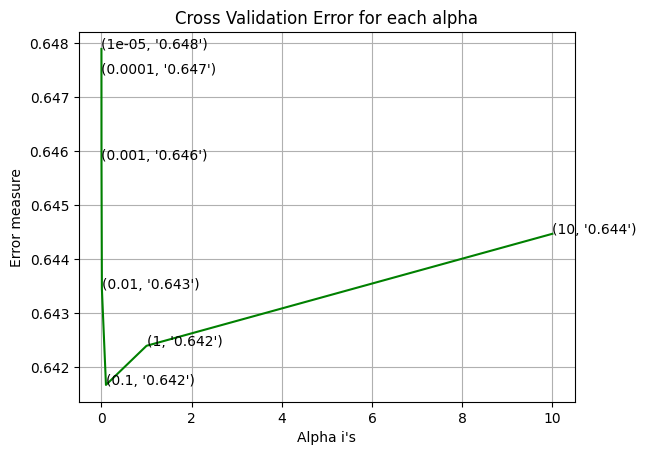

For values of best alpha =  0.1 The train log loss is: 0.6340797726704641
For values of best alpha =  0.1 The cross validation log loss is: 0.6416706284128136


In [15]:
# Hyperparamater tuning for Logistic Regression
alpha = [10 ** x for x in range(-5, 2)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = LogisticRegression(C=i, class_weight='balanced', multi_class='multinomial',solver='lbfgs' ,random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_val)
    cv_log_error_array.append(log_loss(y_val, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_val, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)
clf = LogisticRegression(C=alpha[best_alpha], class_weight='balanced', multi_class='multinomial', solver='lbfgs',random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_val)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_val, predict_y, labels=clf.classes_, eps=1e-15))

Train Log Loss : 0.6340797726704641
-------------------- Confusion matrix --------------------


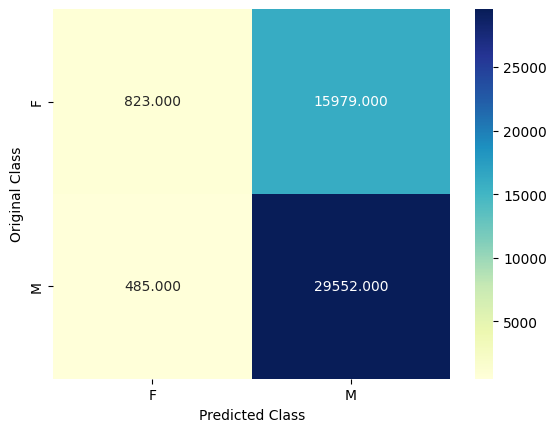

-------------------- Precision matrix (Columm Sum=1) --------------------


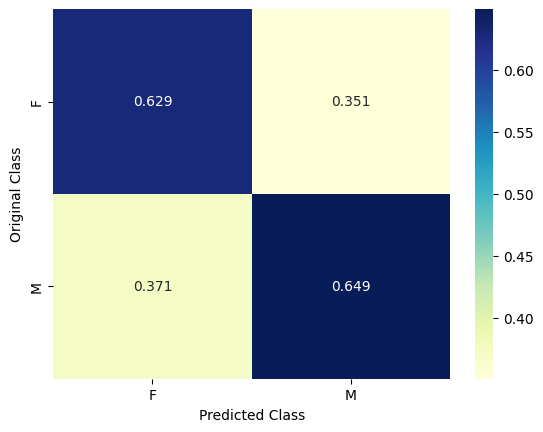

-------------------- Recall matrix (Row sum=1) --------------------


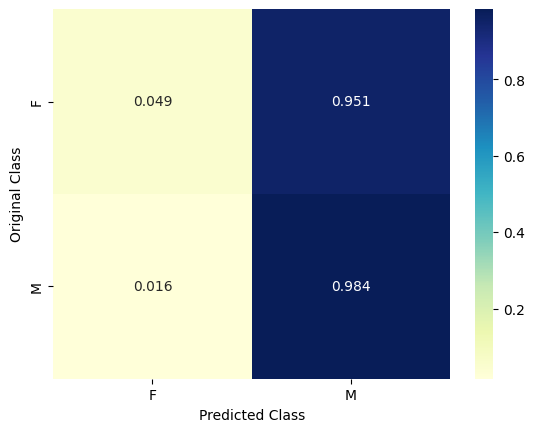

CV Log Loss : 0.6416706284128136
-------------------- Confusion matrix --------------------


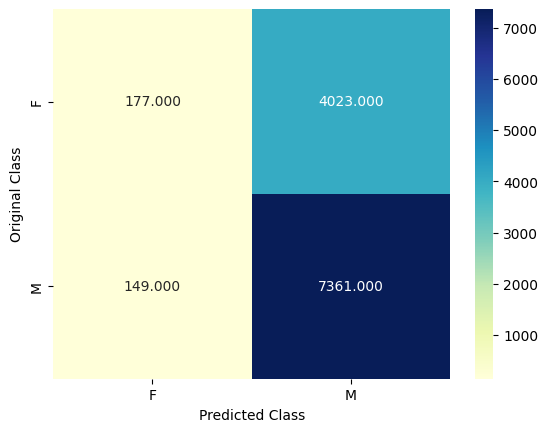

-------------------- Precision matrix (Columm Sum=1) --------------------


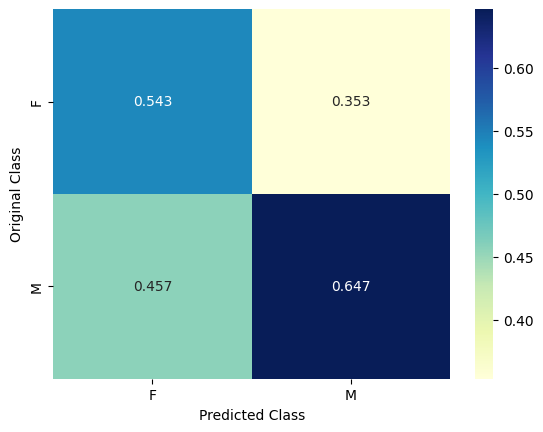

-------------------- Recall matrix (Row sum=1) --------------------


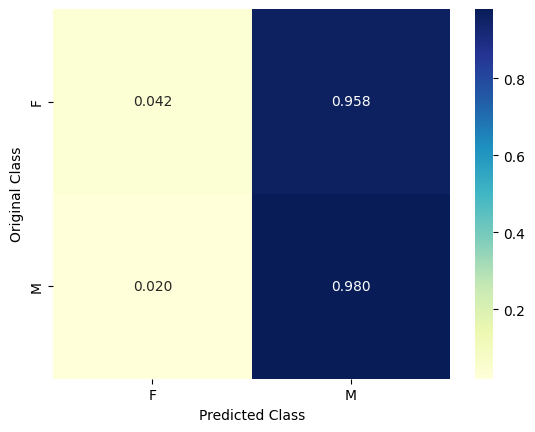

In [16]:
best_c=0.1
lr = LogisticRegression(C=best_c, class_weight='balanced', multi_class='multinomial',solver='lbfgs' ,random_state=42)
lr.fit(X_train, y_train)
#Using Model Calibration
lr_sig_clf = CalibratedClassifierCV(lr, method="sigmoid")
lr_sig_clf.fit(X_train, y_train)

lr_no_events_train_prediction=lr_sig_clf.predict_proba(X_train)
lr_no_events_cv_prediction=lr_sig_clf.predict_proba(X_val)
lr_no_events_test_prediction=lr_sig_clf.predict_proba(test)

train_predicted_classes=np.argmax(lr_no_events_train_prediction, axis=1)
cv_predicted_classes=np.argmax(lr_no_events_cv_prediction, axis=1)


print("Train Log Loss :",log_loss(y_train, lr_no_events_train_prediction))
plot_confusion_matrix(y_train,train_predicted_classes)

print("="*60)

print("CV Log Loss :",log_loss(y_val, lr_no_events_cv_prediction))
plot_confusion_matrix(y_val,cv_predicted_classes )

In [17]:
###saving the best lr model
import joblib as jobl
from joblib import dump

jobl.dump(lr_sig_clf,'no_events_calibrated_logistic_regression.sav')

['no_events_calibrated_logistic_regression.sav']

In [18]:
### saving the test predictions

np.save('lr_no_events_test_prediction',lr_no_events_test_prediction)

### XG Boost classifier

#### **Hyper Parameter Tuning with n_estimators**

In [19]:
#!pip3 install xgboost
#!pip3 install mlxtend
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [20]:
class XGBoostClassifier():
    def __init__(self, num_boost_round=50, **params):
        self.clf = None
        self.num_boost_round = num_boost_round
        self.params = params
        self.params.update({'objective': 'multi:softprob'})
 
    def fit(self, X, y, num_boost_round=None):
        num_boost_round = num_boost_round or self.num_boost_round
        self.label2num = {label: i for i, label in enumerate(sorted(set(y)))}
        dtrain = xgb.DMatrix(X, label=[self.label2num[label] for label in y])
        self.clf = xgb.train(params=self.params, dtrain=dtrain, num_boost_round=num_boost_round)
 
    def predict(self, X):
        num2label = {i: label for label, i in self.label2num.items()}
        Y = self.predict_proba(X)
        y = np.argmax(Y, axis=1)
        return np.array([num2label[i] for i in y])
 
    def predict_proba(self, X):
        dtest = xgb.DMatrix(X)
        return self.clf.predict(dtest)
 
    def score(self, X, y):
        Y = self.predict_proba(X)
        return 1 / logloss(y, Y)
 
    def get_params(self, deep=True):
        return self.params
 
    def set_params(self, **params):
        if 'num_boost_round' in params:
            self.num_boost_round = params.pop('num_boost_round')
        if 'objective' in params:
            del params['objective']
        self.params.update(params)
        return self
    
    
def logloss(y_true, Y_pred):
    label2num = dict((name, i) for i, name in enumerate(sorted(set(y_true))))
    return -1 * sum(math.log(y[label2num[label]]) if y[label2num[label]] > 0 else -np.inf for y, label in zip(Y_pred, y_true)) / len(Y_pred)

In [21]:
xgb_model = XGBClassifier(eval_metric = 'merror')

parameters = {
    'n_estimators': [100],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
     'eta': [0.05],
     'max_depth':range(6,12,2), #default 5, increase this value will make the model more complex / likely to be overfitting
     'min_child_weight':range(1,6,2) #default 1, The larger, the more conservative the algorithm will be
}
grid_obj = GridSearchCV(xgb_model, parameters, scoring="neg_log_loss", n_jobs=1, cv=2)
grid_obj = grid_obj.fit(X_train, y_train)

In [22]:
#grid_obj.grid_scores_
best_parameters= grid_obj.best_params_
score = grid_obj.best_score_
print('best_parameters:')
best_parameters

best_parameters:


{'colsample_bytree': 0.8,
 'eta': 0.05,
 'max_depth': 10,
 'min_child_weight': 3,
 'n_estimators': 100,
 'subsample': 0.8}

In [23]:
print('score')
score

score


-0.643350043258828

In [24]:
xgb_model = XGBClassifier(eval_metric = 'merror')

parameters = {
    'n_estimators': [100],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
     'eta': [0.05],
     'max_depth': [10],
     'min_child_weight':[5],
    'gamma':[0,0.1,0.2] #minimum loss reduction required to make a further partition on a leaf node of the tree. The larger, the more conservative the algorithm will be.
}

grid_obj = GridSearchCV(xgb_model, parameters, scoring="neg_log_loss", n_jobs=1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

In [25]:
#grid_obj.grid_scores_
best_parameters= grid_obj.best_params_
score = grid_obj.best_score_
print('best_parameters:')
best_parameters

best_parameters:


{'colsample_bytree': 0.8,
 'eta': 0.05,
 'gamma': 0.1,
 'max_depth': 10,
 'min_child_weight': 5,
 'n_estimators': 100,
 'subsample': 0.8}

In [26]:
print('score')
score

score


-0.6426986734372832

In [27]:
xgb_model = XGBClassifier(eval_metric = 'mlogloss')

parameters = {
    'n_estimators': [100],
    'subsample': [0.7,0.8,0.9], #0.5 means that XGBoost randomly collected half of the data instances to grow trees and this will prevent overfitting
    'colsample_bytree': [0.7,0.8,0.9], #subsample ratio of columns when constructing each tree
     'eta': [0.05],
     'max_depth': [10],
     'min_child_weight':[5],
    'gamma':[0.1] 
}

grid_obj = GridSearchCV(xgb_model, parameters, scoring="neg_log_loss", n_jobs=1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

In [28]:
#grid_obj.grid_scores_
best_parameters= grid_obj.best_params_
score = grid_obj.best_score_
print('best_parameters:')
best_parameters

best_parameters:


{'colsample_bytree': 0.9,
 'eta': 0.05,
 'gamma': 0.1,
 'max_depth': 10,
 'min_child_weight': 5,
 'n_estimators': 100,
 'subsample': 0.7}

In [29]:
print('score')
score

score


-0.6426680193630423

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 50, n_jobs=None)
parameters = {'n_estimators': [500], 
              'max_features': ['log2', 'sqrt','auto'], #The number of features to consider when looking for the best split
              'max_depth': [50,80,100,150], 
              'min_samples_split': [5,7,9,11]
             }
grid_obj = GridSearchCV(rf_model, parameters, scoring="neg_log_loss",n_jobs=4,cv = 5)
grid_obj = grid_obj.fit(X_train,y_train)
model_params = grid_obj.best_params_
model_params

### Stacking classifier

In [30]:
from sklearn import preprocessing
from mlxtend.classifier import StackingCVClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn import model_selection
import numpy as np
from xgboost import XGBClassifier

In [31]:
stacking_demo = StackingCVClassifier(classifiers=[lr,rf_model], meta_classifier=xgb_model, use_probas=True, cv=3)

NameError: name 'rf_model' is not defined

In [30]:
# Do CV
for clf, label in zip([clf, rf_model, stacking_demo], 
                     ['lr', 
                       'Random Forest', 
                       'StackingClassifier']):
    
    scores = model_selection.cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.58 (+/- 0.01) [lr]
Accuracy: 0.58 (+/- 0.00) [Random Forest]
Accuracy: nan (+/- nan) [StackingClassifier]


### Model Evaluation for Gender prediction without events

In [2]:
pred = stacking_demo.predict(X_test)

#Construct the Confusion Matrix
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm = confusion_matrix(y_test, pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

NameError: name 'stacking_demo' is not defined

### Devices with Events - Classification model for Gender

In [ ]:
# Loading the csr matrix from disk
from scipy.sparse import load_npz

X_gender = load_npz('X_train_gender.npz')
X_test_gender = load_npz('X_test_gender.npz')
y_gender = np.load('y_gender.npy')

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_gender, y_gender,stratify=y_gender,test_size=0.2,random_state=9)
test=X_test_gender
print('All features Events: train shape {}, test shape {}'.format(X_train.shape, X_val.shape))

In [ ]:
X_train.data[np.isnan(X_train.data)] = 0.0
X_test_gender.data[np.isnan(X_test_gender.data)]=0.0
X_val.data[np.isnan(X_val.data)] = 0.0

### Logistic regression for Gender classification

for alpha = 1e-05
Log Loss : 0.641636043601676
for alpha = 0.0001
Log Loss : 0.6388640034382429
for alpha = 0.001
Log Loss : 0.6363065646399898
for alpha = 0.01
Log Loss : 0.6359049090479109
for alpha = 0.1
Log Loss : 0.6367854764205508
for alpha = 1
Log Loss : 0.639708906580414
for alpha = 10
Log Loss : 0.644482751365357


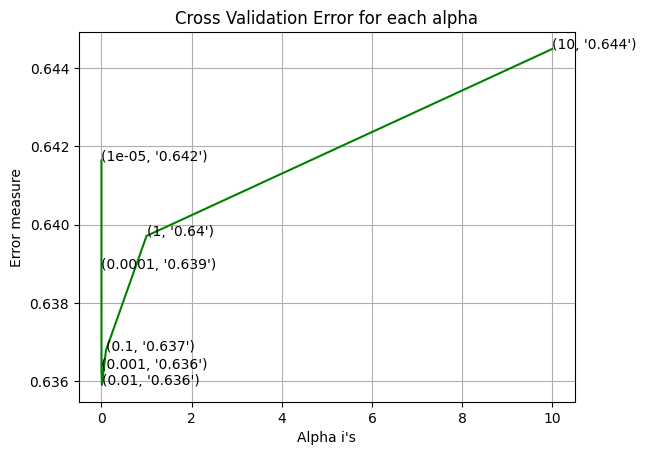

For values of best alpha =  0.01 The train log loss is: 0.6181664528975622
For values of best alpha =  0.01 The cross validation log loss is: 0.6359049090479109


In [15]:
# Hyperparamater tuning for Logistic Regression
alpha = [10 ** x for x in range(-5, 2)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = LogisticRegression(C=i, class_weight='balanced', multi_class='multinomial',solver='lbfgs' ,random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_val)
    cv_log_error_array.append(log_loss(y_val, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_val, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)
clf = LogisticRegression(C=alpha[best_alpha], class_weight='balanced', multi_class='multinomial', solver='lbfgs',random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_val)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_val, predict_y, labels=clf.classes_, eps=1e-15))

Train Log Loss : 0.6108323140516643
-------------------- Confusion matrix --------------------


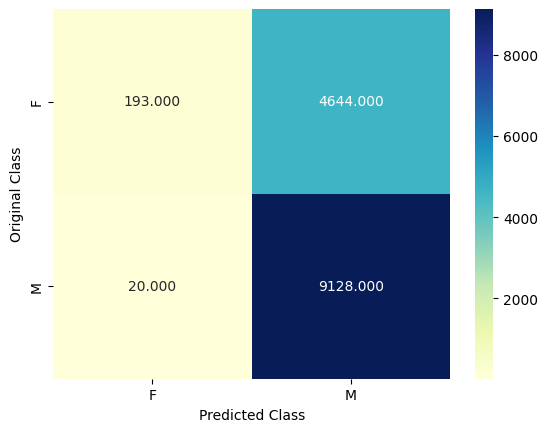

-------------------- Precision matrix (Columm Sum=1) --------------------


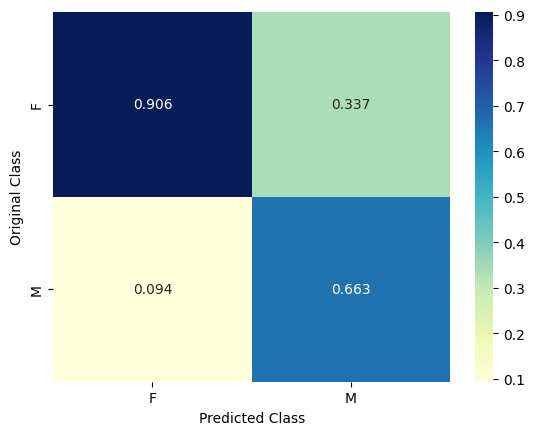

-------------------- Recall matrix (Row sum=1) --------------------


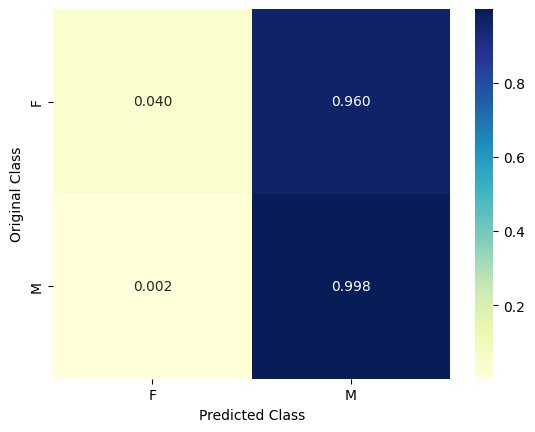

CV Log Loss : 0.6367854764205508
-------------------- Confusion matrix --------------------


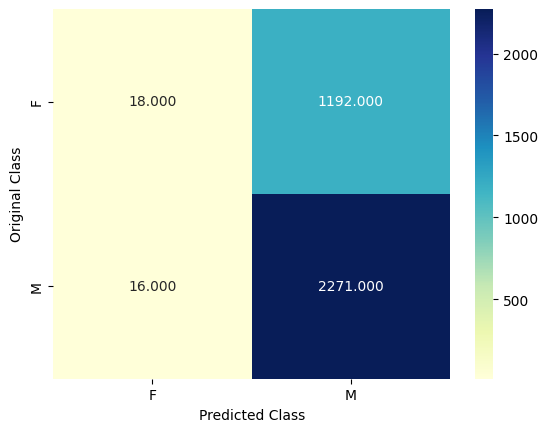

-------------------- Precision matrix (Columm Sum=1) --------------------


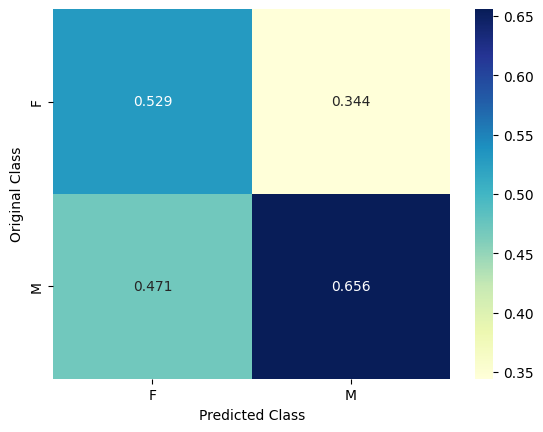

-------------------- Recall matrix (Row sum=1) --------------------


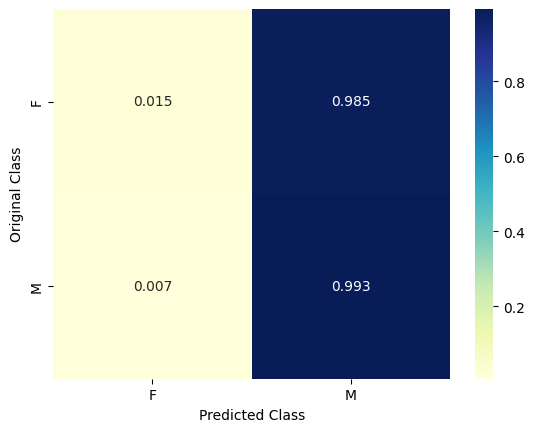

In [18]:
best_c=0.1
lr = LogisticRegression(C=best_c, class_weight='balanced', multi_class='multinomial',solver='lbfgs' ,random_state=42)
lr.fit(X_train, y_train)
#Using Model Calibration
lr_sig_clf = CalibratedClassifierCV(lr, method="sigmoid")
lr_sig_clf.fit(X_train, y_train)

lr_no_events_train_prediction=lr_sig_clf.predict_proba(X_train)
lr_no_events_cv_prediction=lr_sig_clf.predict_proba(X_val)
lr_no_events_test_prediction=lr_sig_clf.predict_proba(test)

train_predicted_classes=np.argmax(lr_no_events_train_prediction, axis=1)
cv_predicted_classes=np.argmax(lr_no_events_cv_prediction, axis=1)


print("Train Log Loss :",log_loss(y_train, lr_no_events_train_prediction))
plot_confusion_matrix(y_train,train_predicted_classes)

print("="*60)

print("CV Log Loss :",log_loss(y_val, lr_no_events_cv_prediction))
plot_confusion_matrix(y_val,cv_predicted_classes )

### XG Boost classifier

In [22]:
xgb_model = XGBClassifier(eval_metric = 'merror')

parameters = {
    'n_estimators': [100],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
     'eta': [0.05],
     'max_depth':range(6,12,2), #default 5, increase this value will make the model more complex / likely to be overfitting
     'min_child_weight':range(1,6,2) #default 1, The larger, the more conservative the algorithm will be
}
grid_obj = GridSearchCV(xgb_model, parameters, scoring="neg_log_loss", n_jobs=1, cv=2)
grid_obj = grid_obj.fit(X_train, y_train)

In [23]:
#grid_obj.grid_scores_
best_parameters= grid_obj.best_params_
score = grid_obj.best_score_
print('best_parameters:')
best_parameters

best_parameters:


{'colsample_bytree': 0.8,
 'eta': 0.05,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 100,
 'subsample': 0.8}

In [24]:
print('score')
score

score


-0.6379935298867438

In [25]:
xgb_model = XGBClassifier(eval_metric = 'merror')

parameters = {
    'n_estimators': [100],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
     'eta': [0.05],
     'max_depth': [10],
     'min_child_weight':[5],
    'gamma':[0,0.1,0.2] #minimum loss reduction required to make a further partition on a leaf node of the tree. The larger, the more conservative the algorithm will be.
}

grid_obj = GridSearchCV(xgb_model, parameters, scoring="neg_log_loss", n_jobs=1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

In [26]:
#grid_obj.grid_scores_
best_parameters= grid_obj.best_params_
score = grid_obj.best_score_
print('best_parameters:')
best_parameters

best_parameters:


{'colsample_bytree': 0.8,
 'eta': 0.05,
 'gamma': 0,
 'max_depth': 10,
 'min_child_weight': 5,
 'n_estimators': 100,
 'subsample': 0.8}

In [27]:
print('score')
score

score


-0.6361066822818999

In [28]:
xgb_model = XGBClassifier(eval_metric = 'mlogloss')

parameters = {
    'n_estimators': [100],
    'subsample': [0.7,0.8,0.9], #0.5 means that XGBoost randomly collected half of the data instances to grow trees and this will prevent overfitting
    'colsample_bytree': [0.7,0.8,0.9], #subsample ratio of columns when constructing each tree
     'eta': [0.05],
     'max_depth': [10],
     'min_child_weight':[5],
    'gamma':[0.1] 
}

grid_obj = GridSearchCV(xgb_model, parameters, scoring="neg_log_loss", n_jobs=1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

In [29]:
#grid_obj.grid_scores_
best_parameters= grid_obj.best_params_
score = grid_obj.best_score_
print('best_parameters:')
best_parameters

best_parameters:


{'colsample_bytree': 0.7,
 'eta': 0.05,
 'gamma': 0.1,
 'max_depth': 10,
 'min_child_weight': 5,
 'n_estimators': 100,
 'subsample': 0.8}

In [30]:
print('score')
score

score


-0.6364319107451628

### Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
parameters = {'n_estimators': [500], 
              'max_features': ['log2', 'sqrt','auto'], #The number of features to consider when looking for the best split
              'max_depth': [50,80,100,150], 
              'min_samples_split': [5,7,9,11]
             }
grid_obj = GridSearchCV(rf_model, parameters, scoring="neg_log_loss",n_jobs=4,cv = 5)
grid_obj.fit(X_train,y_train)
model_params = grid_obj.best_params_
model_params

### Stacking classifier

In [ ]:
stacking_demo = StackingCVClassifier(classifiers=[lr,rf_model], meta_classifier=xgb_model, use_probas=True, cv=3)

In [ ]:
# Do CV
for clf, label in zip([clf, rf_model, stacking_demo], 
                     ['lr', 
                       'Random Forest', 
                       'StackingClassifier']):
    
    scores = model_selection.cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


### Model Evaluation for Gender prediction with events

In [ ]:
from sklearn import model_selection
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score


pred = stacking_demo.predict(X_val)

#Construct the Confusion Matrix
labels = ['M', 'F']
cm = confusion_matrix(y_val, pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
precision = precision_score(y_val, pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_val, pred)
print('Recall: %f' % recall)
# f1: tp / (tp + fp + fn)
f1 = f1_score(y_val, pred)
print('F1 score: %f' % f1)

In [ ]:
# predict probabilities
probs = stacking_demo.predict_proba(X_val)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_val, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_val, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

In [ ]:
accuracy = log_loss(y_val, pred)
print("Logloss: %.2f" % (accuracy))

### Devices without Events - Regression model for Age

In [ ]:
# Loading the csr matrix from disk
from scipy.sparse import load_npz

X_nage = load_npz('X_ntrain_age.npz')
X_ntest_age = load_npz('X_ntest_age.npz')
y_nage = np.load('y_nage.npy')

In [8]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X_nage, y_nage,random_state=42, test_size=0.2)
#test=X_ntest_age
print('All features Events: train shape {}, test shape {}'.format(X_train.shape, X_test.shape))

All features Events: train shape (46839, 1696), test shape (11710, 1696)


### Linear regression for Age

In [9]:
# Training the Linear Regression model and predicting the age
regressor = LinearRegression().fit(X_train, y_train)

In [10]:
print(regressor.intercept_)

22.94340116350691


In [11]:
print(regressor.coef_)

[ 9.02833108  4.5282664   0.41845035 ...  0.         10.90930755
 -0.97173571]


In [12]:
y_pred = regressor.predict(X_test)

In [13]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

       Actual  Predicted
0          26  22.156973
1          18  21.213082
2          13  21.889351
3          23  23.735865
4          25  30.608730
...       ...        ...
11705      27  22.533247
11706      16  26.358970
11707      27  22.882299
11708      15  22.156973
11709      12  23.644898

[11710 rows x 2 columns]


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [16]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 7.37
Mean squared error: 96.80
Root mean squared error: 9.84


### XGBoost regressor

In [17]:
from sklearn.preprocessing import MaxAbsScaler
#!pip3 install xgboost
#!pip3 install mlxtend
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Preprocessing the output of regression model using MinMaxScaler
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xbg_reg = XGBRegressor().fit(X_train_scaled, y_train)

r2 = xbg_reg.score(X_test_scaled, y_test)
print(f"XGBoost Regressor: {r2}")

XGBoost Regressor: 0.0298231102482982


### Random Forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state = 50)
parameters = {'n_estimators': [500], 
              'max_features': ['log2', 'sqrt','auto'], #The number of features to consider when looking for the best split
              'max_depth': [50,80,100,150], 
              'min_samples_split': [5,7,9,11]
             }
grid_obj = GridSearchCV(rf_model, parameters, scoring="neg_log_loss",n_jobs=4,cv = 5)
grid_obj.fit(X_train,y_train)
model_params = grid_obj.best_params_
model_params

/home/ec2-user/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ec2-user/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ec2-user/.local/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/ec2-user/.local/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 298, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "/home/ec2-user/.local/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'

  UserWarning,
/home/ec2-user/.local/

### Stacking regressor

In [ ]:
from mlxtend.regressor import StackingCVRegressor

stacking_demo = StackingCVRegressor(regressors=[regressor,rf_model], meta_regressor=xbg_reg, cv=3)

In [ ]:
# Do CV
for clf, label in zip([regressor, rf_model, stacking_demo], 
                     ['lr', 
                       'Random Forest', 
                       'StackingClassifier']):
    
    scores = model_selection.cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

### Model Evaluation for Age prediction without events

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

classifier = OneVsRestClassifier(stacking_demo)
y_score = classifier.fit(X_train, y_train).predict_proba(X_val)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn import preprocessing

# Scaling the data
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X_train)
x_train = pd.DataFrame(scaled_df)
scaled_df = scaler.fit_transform(X_test)
preddata = pd.DataFrame(scaled_df)

# Fit on train data / predict on test data
sclf_fit = stacking_demo.fit(x_train, y_train)
mypreds = sclf_fit.predict_proba(preddata)
# "predict" give us classes, "predict_proba" give us probabilities

# Probabilities for classes (1,0)
zeros = [i[0] for i in mypreds]
ones  = [i[1] for i in mypreds]

# Get IDs and predictions
y_id = predids.values.tolist()
preddf = pd.DataFrame({'ID_code': y_id,'target': ones})
preddf['ID_code'] = preddf['ID_code'].map(lambda x: str(x)[:-2])
preddf['ID_code'] = preddf['ID_code'].map(lambda x: str(x)[2:])

# Look at predictions
print(preddf.head())

### Devices with Events - Regression model for Age

In [199]:
# Loading the csr matrix from disk
from scipy.sparse import load_npz

X_age = load_npz('X_train_age.npz')
X_test_age = load_npz('X_test_age.npz')
y_age = np.load('y_age.npy')

In [200]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X_age, y_age,random_state=42, test_size=0.2)
#test=X_ntest_age
print('All features Events: train shape {}, test shape {}'.format(X_train.shape, X_val.shape))

All features Events: train shape (13985, 21018), test shape (11710, 1696)


In [203]:
X_train.data[np.isnan(X_train.data)] = 0.0
X_test_age.data[np.isnan(X_test_age.data)]=0.0
X_test.data[np.isnan(X_test.data)] = 0.0

### Linear regression

In [204]:
# Training the Linear Regression model and predicting the age
regressor = LinearRegression().fit(X_train, y_train)

In [205]:
print(regressor.intercept_)

16.890911147467435


In [206]:
print(regressor.coef_)

[ 0.          3.30057322  1.8361674  ...  0.         -0.79515644
 -0.6456368 ]


In [207]:
y_pred = regressor.predict(X_test)

In [208]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

      Actual  Predicted
0         51  20.854128
1         20  23.503921
2         15  15.296956
3         16  25.699123
4         23  16.195115
...      ...        ...
3492       7  14.532285
3493      11  18.753560
3494      10  15.662539
3495      41  30.907654
3496      27  24.051248

[3497 rows x 2 columns]


In [209]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [210]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [211]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 8.00
Mean squared error: 125.08
Root mean squared error: 11.18


### XGBoost regressor

In [212]:
from sklearn.preprocessing import MaxAbsScaler
#!pip3 install xgboost
#!pip3 install mlxtend
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Preprocessing the output of regression model using MinMaxScaler
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xbg_reg = XGBRegressor().fit(X_train_scaled, y_train)

r2 = xbg_reg.score(X_test_scaled, y_test)
print(f"XGBoost Regressor: {r2}")

XGBoost Regressor: 0.033309418001390756


### Random Forest regressor

In [214]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state = 50)
parameters = {'n_estimators': [500], 
              'max_features': ['log2', 'sqrt','auto'], #The number of features to consider when looking for the best split
              'max_depth': [50,80,100,150], 
              'min_samples_split': [5,7,9,11]
             }

grid_obj = GridSearchCV(rf_model, parameters, scoring="neg_log_loss",n_jobs=4,cv = 5)
grid_obj.fit(X_train,y_train)
model_params = grid_obj.best_params_
model_params

/home/ec2-user/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ec2-user/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ec2-user/.local/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/ec2-user/.local/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 298, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "/home/ec2-user/.local/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'

  UserWarning,
/home/ec2-user/.local/

KeyboardInterrupt: 

### Stacking regressor

In [ ]:
from mlxtend.regressor import StackingCVRegressor

stacking_demo = StackingCVRegressor(regressors=[regressor,rf_model], meta_regressor=xbg_reg, cv=3)

# Do CV
for clf, label in zip([regressor, rf_model, stacking_demo], 
                     ['lr', 
                       'Random Forest', 
                       'StackingClassifier']):
    
    scores = model_selection.cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

### Model Evaluation for Age prediction with events

In [ ]:
from sklearn import preprocessing

# Scaling the data
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X_train)
x_train = pd.DataFrame(scaled_df)
scaled_df = scaler.fit_transform(X_test)
preddata = pd.DataFrame(scaled_df)

# Fit on train data / predict on test data
sclf_fit = stacking_demo.fit(x_train, y_train)
mypreds = sclf_fit.predict_proba(preddata)
# "predict" give us classes, "predict_proba" give us probabilities

# Probabilities for classes (1,0)
zeros = [i[0] for i in mypreds]
ones  = [i[1] for i in mypreds]

# Get IDs and predictions
y_id = predids.values.tolist()
preddf = pd.DataFrame({'ID_code': y_id,'target': ones})
preddf['ID_code'] = preddf['ID_code'].map(lambda x: str(x)[:-2])
preddf['ID_code'] = preddf['ID_code'].map(lambda x: str(x)[2:])

# Look at predictions
print(preddf.head())

### Model Evaluation for Age preduction with and without out events